# <span style='background:#90EE90'>Credit EDA Assignment </span>

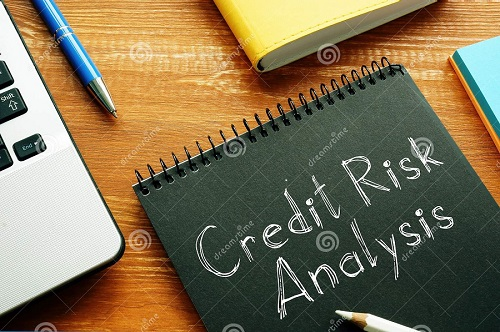

### Importing the libraries  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)

### Importing the "application_data" csv file

In [4]:
data_appli= pd.read_csv("application_data.csv")
#data_appli.head(10)

In [5]:
data_appli.shape

(307511, 122)

In [6]:
## Here we will check the percentage of nan values present in each feature of the data set
## 1-step make the list of features which has missing values

features_with_na=[features for features in data_appli.columns if data_appli[features].isnull().sum()>1]
len(features_with_na)

66

In [7]:
## 2-step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(data_appli[feature].isnull().mean()*100, 2),  ' % missing values')

AMT_ANNUITY 0.0  % missing values
AMT_GOODS_PRICE 0.09  % missing values
NAME_TYPE_SUITE 0.42  % missing values
OWN_CAR_AGE 65.99  % missing values
OCCUPATION_TYPE 31.35  % missing values
CNT_FAM_MEMBERS 0.0  % missing values
EXT_SOURCE_1 56.38  % missing values
EXT_SOURCE_2 0.21  % missing values
EXT_SOURCE_3 19.83  % missing values
APARTMENTS_AVG 50.75  % missing values
BASEMENTAREA_AVG 58.52  % missing values
YEARS_BEGINEXPLUATATION_AVG 48.78  % missing values
YEARS_BUILD_AVG 66.5  % missing values
COMMONAREA_AVG 69.87  % missing values
ELEVATORS_AVG 53.3  % missing values
ENTRANCES_AVG 50.35  % missing values
FLOORSMAX_AVG 49.76  % missing values
FLOORSMIN_AVG 67.85  % missing values
LANDAREA_AVG 59.38  % missing values
LIVINGAPARTMENTS_AVG 68.35  % missing values
LIVINGAREA_AVG 50.19  % missing values
NONLIVINGAPARTMENTS_AVG 69.43  % missing values
NONLIVINGAREA_AVG 55.18  % missing values
APARTMENTS_MODE 50.75  % missing values
BASEMENTAREA_MODE 58.52  % missing values
YEARS_BEGI

### Listing the null values columns having more than 50%

In [8]:
emptycol=data_appli.isnull().sum()/len(data_appli)*100
emptycol=emptycol[emptycol.values>=50]
emptycol

OWN_CAR_AGE                 65.990810
EXT_SOURCE_1                56.381073
APARTMENTS_AVG              50.749729
BASEMENTAREA_AVG            58.515956
YEARS_BUILD_AVG             66.497784
COMMONAREA_AVG              69.872297
ELEVATORS_AVG               53.295980
ENTRANCES_AVG               50.348768
FLOORSMIN_AVG               67.848630
LANDAREA_AVG                59.376738
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAREA_AVG              50.193326
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAREA_AVG           55.179164
APARTMENTS_MODE             50.749729
BASEMENTAREA_MODE           58.515956
YEARS_BUILD_MODE            66.497784
COMMONAREA_MODE             69.872297
ELEVATORS_MODE              53.295980
ENTRANCES_MODE              50.348768
FLOORSMIN_MODE              67.848630
LANDAREA_MODE               59.376738
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAREA_MODE             50.193326
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAREA_MODE          55.179164
APARTMENTS_M

In [9]:
len(emptycol)

41

### Removing those 41 columns

In [10]:
a = emptycol[emptycol.values>=50]

In [11]:
# dropping the empty columns
emptycol = a.index
data_appli.drop(labels=emptycol,axis=1,inplace=True)
print(len(emptycol))

41


In [12]:
features_with_na=[features for features in data_appli.columns if data_appli[features].isnull().sum()>1]
len(features_with_na)

25

## Numerical Variables

In [13]:
# list of numerical variables
numerical_features = [feature for feature in data_appli.columns if data_appli[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualising the numerical variables
data_appli[numerical_features].head()

Number of numerical variables:  68


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in data_appli.columns if data_appli[feature].isnull().sum()>1 and data_appli[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values
print(len(numerical_with_nan))

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(data_appli[feature].isnull().mean()*100,4)))

22
AMT_ANNUITY: 0.0039% missing value
AMT_GOODS_PRICE: 0.0904% missing value
CNT_FAM_MEMBERS: 0.0007% missing value
EXT_SOURCE_2: 0.2146% missing value
EXT_SOURCE_3: 19.8253% missing value
YEARS_BEGINEXPLUATATION_AVG: 48.781% missing value
FLOORSMAX_AVG: 49.7608% missing value
YEARS_BEGINEXPLUATATION_MODE: 48.781% missing value
FLOORSMAX_MODE: 49.7608% missing value
YEARS_BEGINEXPLUATATION_MEDI: 48.781% missing value
FLOORSMAX_MEDI: 49.7608% missing value
TOTALAREA_MODE: 48.2685% missing value
OBS_30_CNT_SOCIAL_CIRCLE: 0.332% missing value
DEF_30_CNT_SOCIAL_CIRCLE: 0.332% missing value
OBS_60_CNT_SOCIAL_CIRCLE: 0.332% missing value
DEF_60_CNT_SOCIAL_CIRCLE: 0.332% missing value
AMT_REQ_CREDIT_BUREAU_HOUR: 13.5016% missing value
AMT_REQ_CREDIT_BUREAU_DAY: 13.5016% missing value
AMT_REQ_CREDIT_BUREAU_WEEK: 13.5016% missing value
AMT_REQ_CREDIT_BUREAU_MON: 13.5016% missing value
AMT_REQ_CREDIT_BUREAU_QRT: 13.5016% missing value
AMT_REQ_CREDIT_BUREAU_YEAR: 13.5016% missing value


### Checking outliers using boxplot

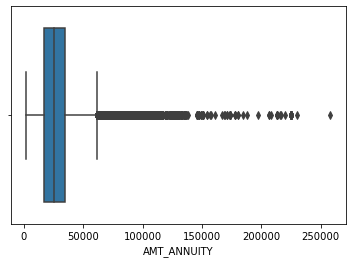

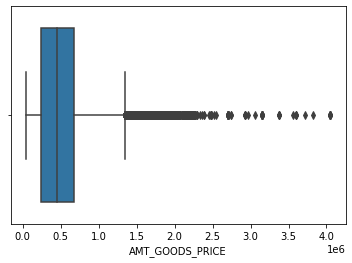

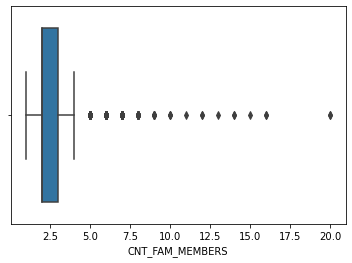

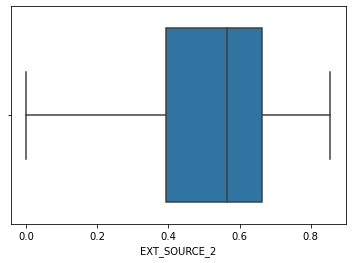

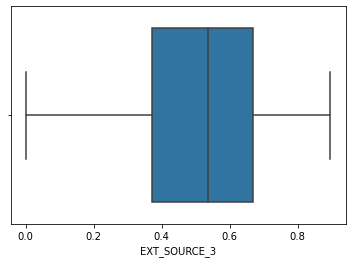

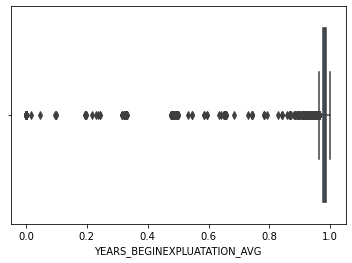

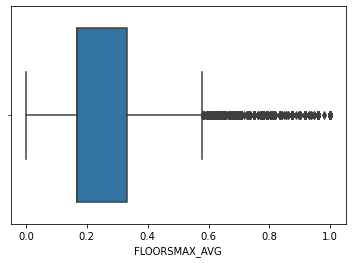

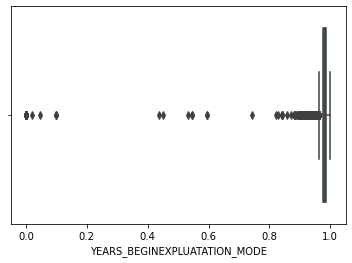

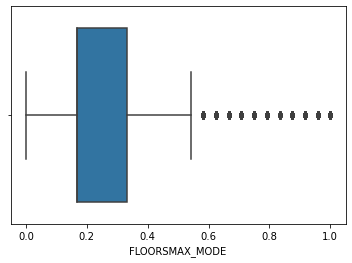

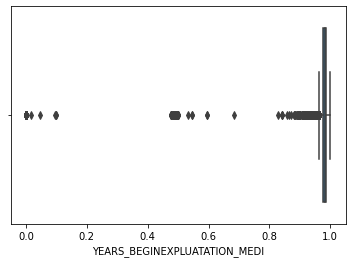

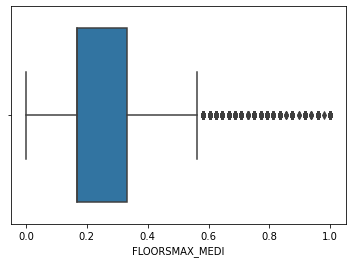

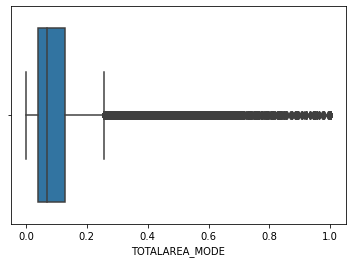

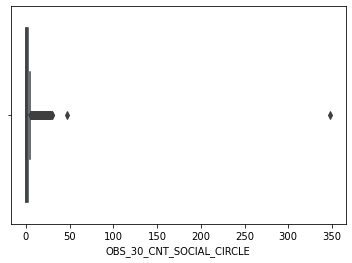

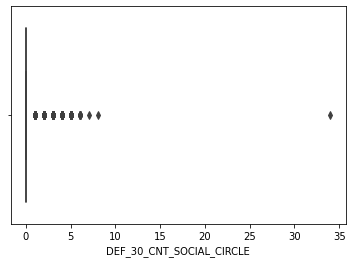

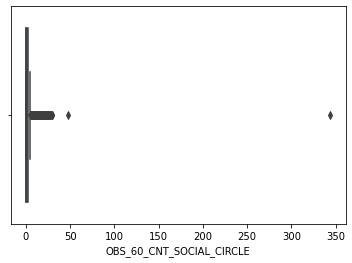

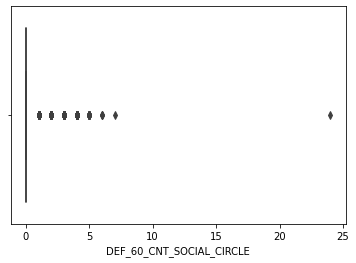

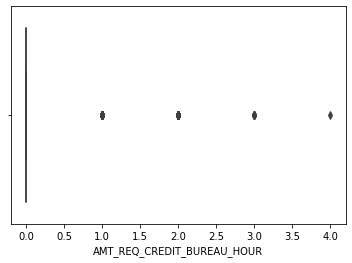

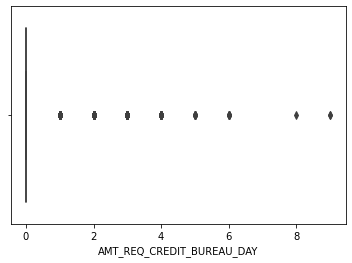

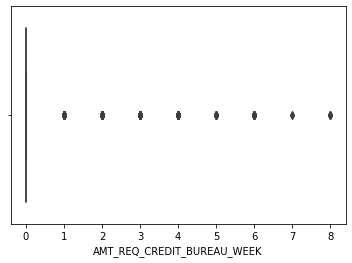

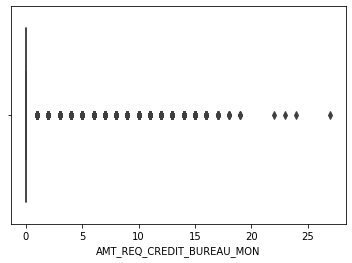

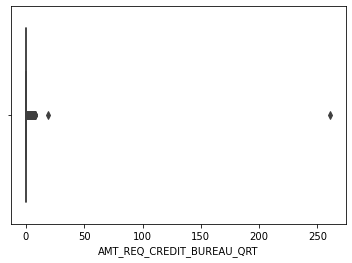

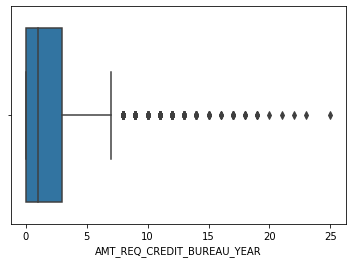

In [15]:
for i in numerical_with_nan:
    sns.boxplot(data=data_appli, x=i)
    plt.show()

In [16]:
## Replacing the numerical Missing Values

for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=data_appli[feature].median()
    
    ## create a new feature to capture nan values
    
    data_appli[feature].fillna(median_value,inplace=True)
    
data_appli[numerical_with_nan].isnull().sum()

AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
CNT_FAM_MEMBERS                 0
EXT_SOURCE_2                    0
EXT_SOURCE_3                    0
YEARS_BEGINEXPLUATATION_AVG     0
FLOORSMAX_AVG                   0
YEARS_BEGINEXPLUATATION_MODE    0
FLOORSMAX_MODE                  0
YEARS_BEGINEXPLUATATION_MEDI    0
FLOORSMAX_MEDI                  0
TOTALAREA_MODE                  0
OBS_30_CNT_SOCIAL_CIRCLE        0
DEF_30_CNT_SOCIAL_CIRCLE        0
OBS_60_CNT_SOCIAL_CIRCLE        0
DEF_60_CNT_SOCIAL_CIRCLE        0
AMT_REQ_CREDIT_BUREAU_HOUR      0
AMT_REQ_CREDIT_BUREAU_DAY       0
AMT_REQ_CREDIT_BUREAU_WEEK      0
AMT_REQ_CREDIT_BUREAU_MON       0
AMT_REQ_CREDIT_BUREAU_QRT       0
AMT_REQ_CREDIT_BUREAU_YEAR      0
dtype: int64

## Categorical Variables

In [17]:
categorical_features=[feature for feature in data_appli.columns if data_appli[feature].dtypes=='O']

print('Number of categorical variables: ', len(categorical_features))

# visualise the numerical variables
data_appli[categorical_features].head()

Number of categorical variables:  13


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN


In [18]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(data_appli[feature].unique())))

The feature is NAME_CONTRACT_TYPE and number of categories are 2
The feature is CODE_GENDER and number of categories are 3
The feature is FLAG_OWN_CAR and number of categories are 2
The feature is FLAG_OWN_REALTY and number of categories are 2
The feature is NAME_TYPE_SUITE and number of categories are 8
The feature is NAME_INCOME_TYPE and number of categories are 8
The feature is NAME_EDUCATION_TYPE and number of categories are 5
The feature is NAME_FAMILY_STATUS and number of categories are 6
The feature is NAME_HOUSING_TYPE and number of categories are 6
The feature is OCCUPATION_TYPE and number of categories are 19
The feature is WEEKDAY_APPR_PROCESS_START and number of categories are 7
The feature is ORGANIZATION_TYPE and number of categories are 58
The feature is EMERGENCYSTATE_MODE and number of categories are 3


In [19]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan=[feature for feature in data_appli.columns if data_appli[feature].isnull().sum()>1 and data_appli[feature].dtypes=='O']

## We will print the numerical nan variables and percentage of missing values
print(len(features_nan))

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(data_appli[feature].isnull().mean()*100,4)))

3
NAME_TYPE_SUITE: 0.4201% missing values
OCCUPATION_TYPE: 31.3455% missing values
EMERGENCYSTATE_MODE: 47.3983% missing values


In [20]:
## Replace missing value with a new label
def replace_cat_feature(data_appli,features_nan):
    data=data_appli.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

data_appli=replace_cat_feature(data_appli,features_nan)

data_appli[features_nan].isnull().sum()

NAME_TYPE_SUITE        0
OCCUPATION_TYPE        0
EMERGENCYSTATE_MODE    0
dtype: int64

### Now there are no null values in the dataframe data_appli

In [21]:
features_with_nan=[features for features in data_appli.columns if data_appli[features].isnull().sum()>1]
len(features_with_nan)

0

In [22]:
data_appli.shape

(307511, 81)

In [23]:
data_appli.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307511 non-null  float64
 10  AMT_GOODS_PRICE               307511 non-null  float64
 11  NAME_TYPE_SUITE               307511 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [24]:
emptyrow=data_appli.isnull().sum(axis=1)
emptyrow=list(emptyrow[emptyrow.values>=0.3*len(data_appli)].index)

print(len(emptyrow))   #no null values

0


### Check datatypes of columns and modify them appropriately

In [25]:
#Making Gender more readable
data_appli['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [26]:
# Dropping the Gender = XNA from the data set as there is not enough data regarding that 
data_appli = data_appli[data_appli['CODE_GENDER']!='XNA']
data_appli['CODE_GENDER'].replace(['M','F'],['Male','Female'],inplace=True)

In [27]:
data_appli['CODE_GENDER'].value_counts()   #We see XNA is removed

Female    202448
Male      105059
Name: CODE_GENDER, dtype: int64

In [28]:
data_appli['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11192
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6879
Construction               6721
Business Entity Type 1     5983
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3277
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [29]:
# So, for column 'ORGANIZATION_TYPE', we have total count of 307511 rows of which 55374 rows are having 'XNA' values.
# Hence, dropping the rows of total 55374 have 'XNA' values in the organization type column

data_appli=data_appli.drop(data_appli.loc[data_appli['ORGANIZATION_TYPE']=='XNA'].index)

In [30]:
data_appli['AMT_INCOME_TOTAL'].quantile([0,0.1,0.3,0.6,0.8,1])

0.0        25650.0
0.1        90000.0
0.3       121500.0
0.6       180000.0
0.8       225000.0
1.0    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [31]:
#Creating a new categorical variable based on income total
data_appli['INCOME_GROUP']=pd.qcut(data_appli['AMT_INCOME_TOTAL'],
                                       q=[0,0.1,0.3,0.6,0.8,1],
                                       labels=['VeryLow','Low','Medium','High','VeryHigh'])

In [32]:
data_appli['AMT_CREDIT'].quantile([0,0.1,0.3,0.6,0.8,1])

0.0      45000.0
0.1     180000.0
0.3     315000.0
0.6     630000.0
0.8     904500.0
1.0    4050000.0
Name: AMT_CREDIT, dtype: float64

In [33]:
#Creating a new categorical variable based on credit total
data_appli['CREDIT_GROUP']=pd.qcut(data_appli['AMT_CREDIT'],
                                       q=[0,0.1,0.3,0.6,0.8,1],
                                       labels=['VeryLow','Low','Medium','High','VeryHigh'])


In [34]:
data_appli['CREDIT_GROUP'].value_counts()

Medium      74745
Low         50805
VeryHigh    50249
High        50209
VeryLow     26125
Name: CREDIT_GROUP, dtype: int64

In [35]:
# Making income and credit amount more readable
data_appli['AMT_CREDIT_LAKHS'] = round(data_appli['AMT_CREDIT']/100000,2)

data_appli['AMT_INCOME_TOTAL_LAKHS'] = round(data_appli['AMT_INCOME_TOTAL']/100000,2)

In [36]:
#Binning DAYS_BIRTH
abs(data_appli['DAYS_BIRTH']).quantile([0,0.1,0.3,0.6,0.8,1])

0.0     7489.0
0.1    10051.0
0.3    12365.0
0.6    15679.0
0.8    18267.6
1.0    25200.0
Name: DAYS_BIRTH, dtype: float64

In [37]:
#Creating a column AGE using DAYS_BIRTH
data_appli['AGE']=abs(data_appli['DAYS_BIRTH'])//365.25

In [38]:
data_appli['AGE'].describe()

count    252133.000000
mean         39.934824
std          10.025750
min          20.000000
25%          32.000000
50%          39.000000
75%          48.000000
max          68.000000
Name: AGE, dtype: float64

In [39]:
## Since the AGE varies from 20 to 68, we can create bins of 5 years starting from 20 to 70
data_appli['AGE_GROUP'] = pd.cut(data_appli['AGE'],bins=np.arange(20,71,5))

In [40]:
#data_appli.head()

### Checking percentage of Defaulters and Non- Defaulters

In [41]:
data_appli['TARGET'].value_counts(normalize=True)*100

0    91.339888
1     8.660112
Name: TARGET, dtype: float64

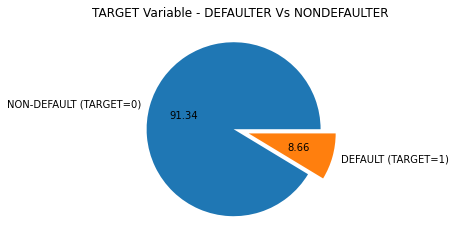

In [42]:
plt.pie(data_appli['TARGET'].value_counts(normalize=True)*100,labels=['NON-DEFAULT (TARGET=0)','DEFAULT (TARGET=1)'],explode=(0.08,0.1),autopct='%.2f')
plt.title('TARGET Variable - DEFAULTER Vs NONDEFAULTER')
plt.show()

#### Its clear that there is an imbalance between people who defaulted and who didn't default. More than 92% of people didn't default as opposed to 8% who defaulted.

## Splitting the dataframe into two separate dfs

In [43]:
TAR0=data_appli[data_appli.TARGET==0]    # Dataframe with all the data related to non-defaulters
TAR1=data_appli[data_appli.TARGET==1]    # Dataframe with all the data related to defaulters

## Univariate Analysis

In [44]:
# Checking percentage of male and female
data_appli['CODE_GENDER'].value_counts(normalize=True)*100

Female    62.338924
Male      37.661076
Name: CODE_GENDER, dtype: float64

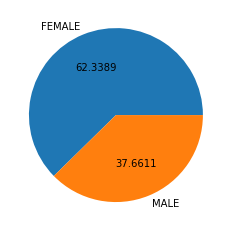

In [45]:
plt.pie(data_appli['CODE_GENDER'].value_counts(normalize=True)*100, labels=["FEMALE", "MALE"], autopct='%.4f')
plt.show()

In [46]:
# Checking perecentage of car owners
data_appli["FLAG_OWN_CAR"].value_counts(normalize=True)*100

N    62.553097
Y    37.446903
Name: FLAG_OWN_CAR, dtype: float64

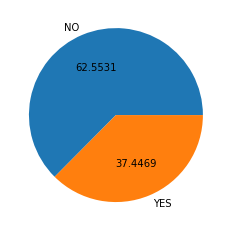

In [47]:
plt.pie(data_appli["FLAG_OWN_CAR"].value_counts(normalize=True)*100, labels=["NO", "YES"], autopct='%.4f')
plt.show()

In [48]:
# INCOME_TYPE
data_appli['NAME_INCOME_TYPE'].value_counts(normalize=True)*100

Working                 62.971130
Commercial associate    28.404057
State servant            8.607759
Student                  0.007139
Pensioner                0.003966
Businessman              0.003966
Maternity leave          0.001983
Name: NAME_INCOME_TYPE, dtype: float64

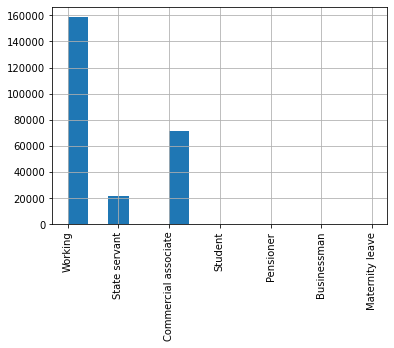

In [49]:
data_appli['NAME_INCOME_TYPE'].hist(bins=15)
plt.xticks(rotation = 90)
plt.show()

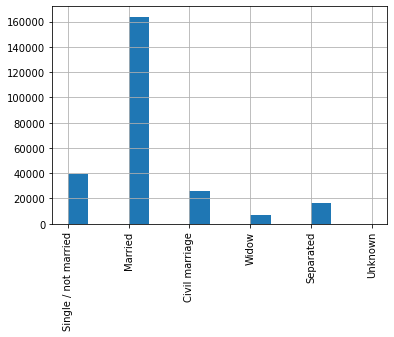

In [50]:
# FAMILY STATUS
data_appli['NAME_FAMILY_STATUS'].hist(bins=15)
plt.xticks(rotation = 90)
plt.show()

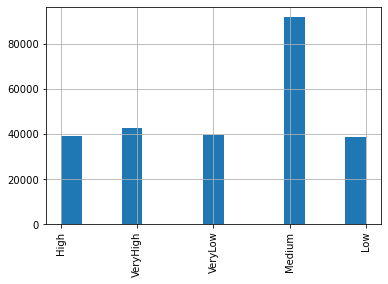

In [51]:
#INCOME_GROUP
data_appli['INCOME_GROUP'].hist(bins=15)
plt.xticks(rotation = 90)
plt.show()

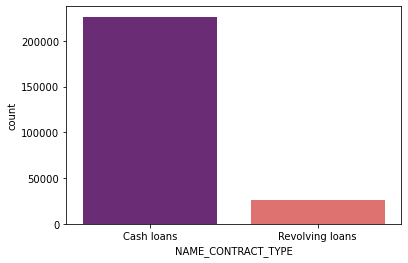

In [52]:
# CONTRACT TYPE
sns.countplot(data = data_appli, x= 'NAME_CONTRACT_TYPE', order=data_appli['NAME_CONTRACT_TYPE'].value_counts().index, palette='magma') 
plt.show()

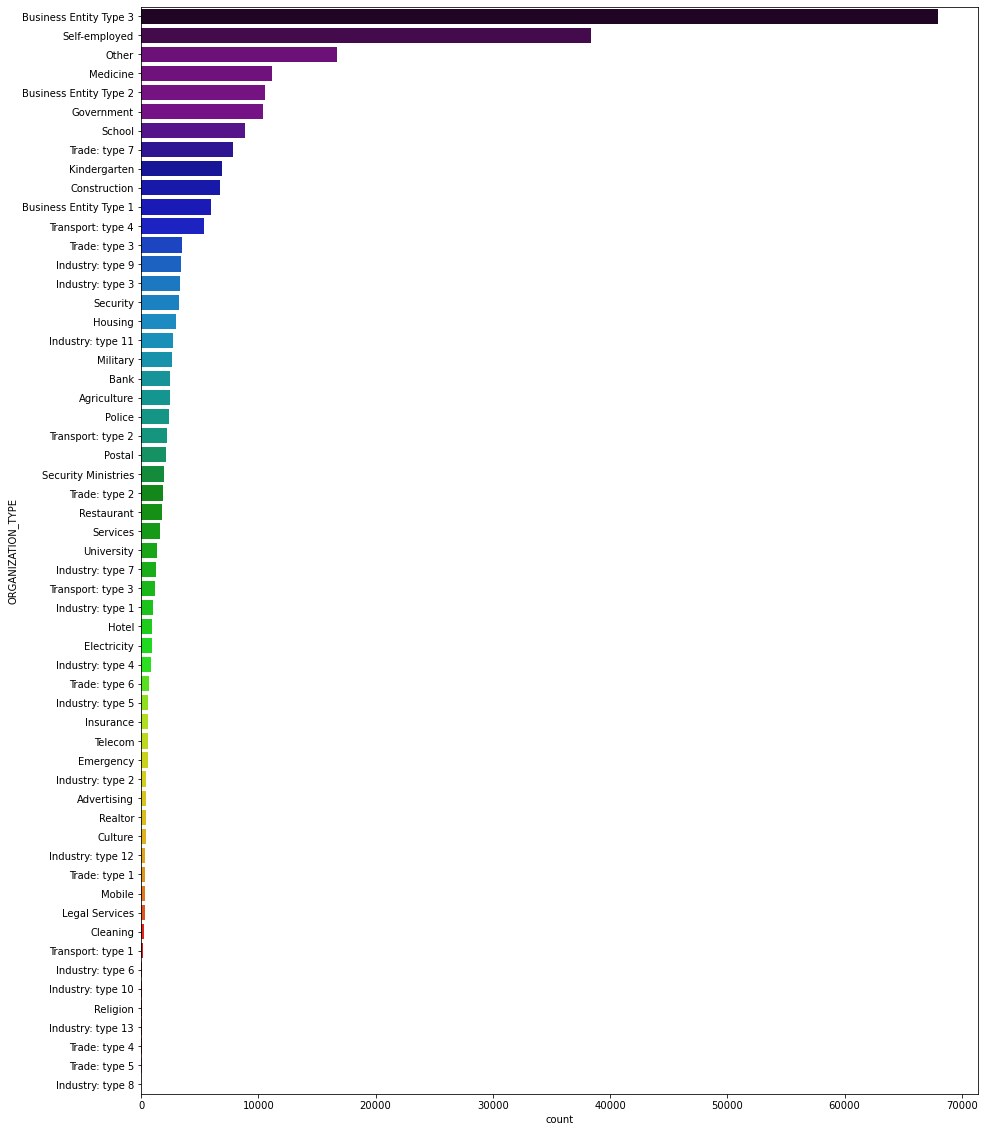

In [53]:
# ORGANIZATION TYPE
plt.figure(figsize=(15,20))
plt.yticks(rotation=0)
sns.countplot(data=data_appli,y='ORGANIZATION_TYPE',order=data_appli['ORGANIZATION_TYPE'].value_counts().index,palette='nipy_spectral')
plt.show()

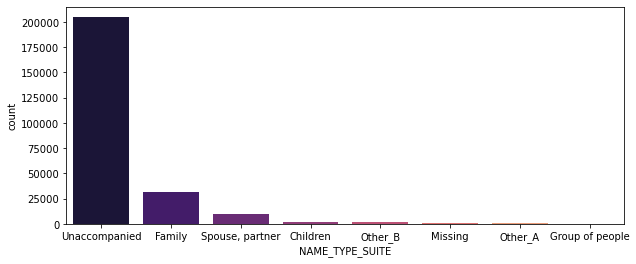

In [54]:
# Suite Type
plt.figure(figsize=(10,4))
sns.countplot(data = data_appli, x= 'NAME_TYPE_SUITE', order=data_appli['NAME_TYPE_SUITE'].value_counts().index, palette='magma') 
plt.show()

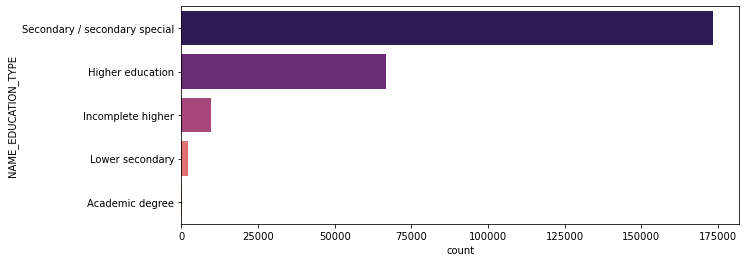

In [55]:
# EDUCATION TYPE
plt.figure(figsize=(10,4))
sns.countplot(data = data_appli, y= "NAME_EDUCATION_TYPE", order=data_appli["NAME_EDUCATION_TYPE"].value_counts().index, palette='magma') 
plt.show()

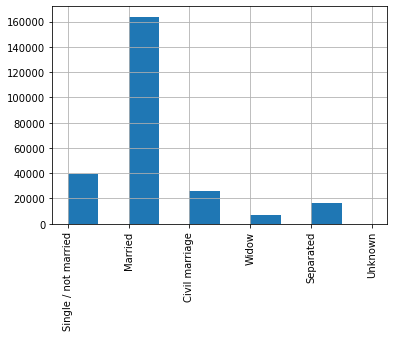

In [56]:
# FAMILY STATUS
data_appli['NAME_FAMILY_STATUS'].hist(bins=10)
plt.xticks(rotation = 90)
plt.show()

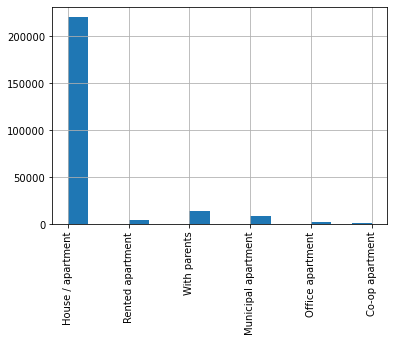

In [57]:
# HOUSING TYPE
data_appli['NAME_HOUSING_TYPE'].hist(bins=15)
plt.xticks(rotation = 90)
plt.show()

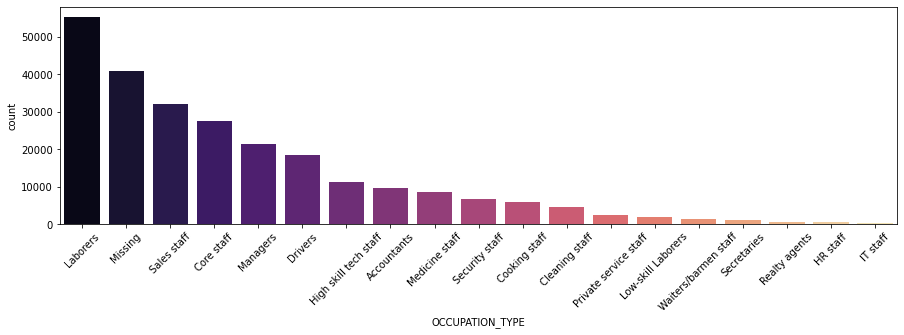

In [58]:
# OCCUPATION TYPE
plt.figure(figsize=(15,4))
sns.countplot(data = data_appli, x= 'OCCUPATION_TYPE', order=data_appli['OCCUPATION_TYPE'].value_counts().index, palette='magma') 
plt.xticks(rotation=45)
plt.show()

In [59]:
data_appli['CNT_FAM_MEMBERS'].value_counts()

2.0     123330
3.0      51466
1.0      49049
4.0      24359
5.0       3417
6.0        396
7.0         78
8.0         19
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
13.0         1
15.0         1
16.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

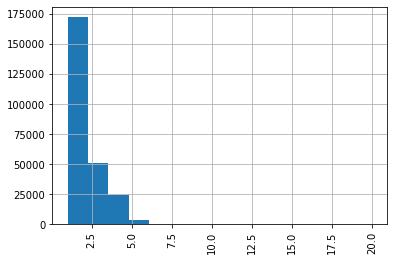

In [60]:
#CNT_FAM_MEMBERS
data_appli['CNT_FAM_MEMBERS'].hist(bins=15)
plt.xticks(rotation = 90)
plt.show()

In [61]:
data_appli["REGION_RATING_CLIENT"].value_counts(normalize=True)*100

2    73.547294
3    15.456922
1    10.995784
Name: REGION_RATING_CLIENT, dtype: float64

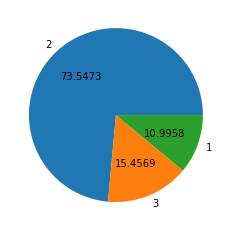

In [62]:
#REGION_RATING_CLIENT
plt.pie(data_appli["REGION_RATING_CLIENT"].value_counts(normalize=True)*100, labels=["2", "3","1"], autopct='%.4f')
plt.show()

In [63]:
data_appli["REGION_RATING_CLIENT_W_CITY"].value_counts(normalize=True)*100

2    74.299279
3    14.016809
1    11.683913
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64

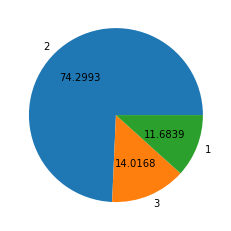

In [64]:
#"REGION_RATING_CLIENT_W_CITY"
plt.pie(data_appli["REGION_RATING_CLIENT_W_CITY"].value_counts(normalize=True)*100, labels=["2", "3","1"], autopct='%.4f')
plt.show()

In [65]:
# WEEKDAY_APPR_PROCESS_START
data_appli["WEEKDAY_APPR_PROCESS_START"].value_counts()

TUESDAY      43947
WEDNESDAY    42332
MONDAY       41591
THURSDAY     41196
FRIDAY       40895
SATURDAY     28321
SUNDAY       13851
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

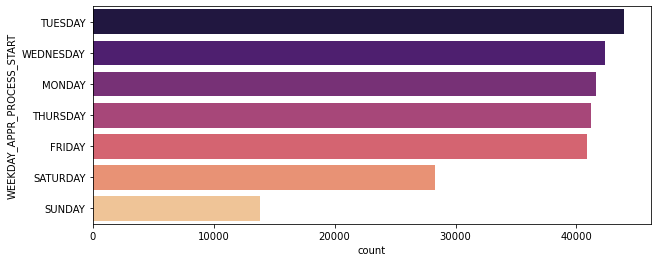

In [66]:
plt.figure(figsize=(10,4))
sns.countplot(data = data_appli, y= "WEEKDAY_APPR_PROCESS_START", order=data_appli["WEEKDAY_APPR_PROCESS_START"].value_counts().index, palette='magma') 
plt.show()

In [67]:
# REG_REGION_NOT_LIVE_REGION
data_appli["REG_REGION_NOT_LIVE_REGION"].value_counts()

0    247786
1      4347
Name: REG_REGION_NOT_LIVE_REGION, dtype: int64

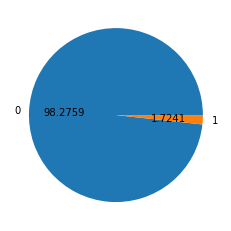

In [68]:
plt.pie(data_appli["REG_REGION_NOT_LIVE_REGION"].value_counts(normalize=True)*100, labels=["0","1"], autopct='%.4f')
plt.show()

### Few Important Observations

1.Highest frequency of income type of client is Working.
2.Highest frequency of family status of client is Married.
3.Highest frequency of income group of client is Medium income range.
4.Maximum contract type chosen by client is Cash loans.
5.Organization type of maximum client is Buisness type 3.
6.Maximum client has Secomdary education.
7.Maximum client are married.
8.Maximum client stay in House/Apartment.
9.Maximum occupation type of client is of Labourers.
10.Family member count for most the clients is 2.
11.Region rating of most of the clients is 2.
12.Loan process done maximum on Tuesday and Wednesday.
13.98.27% clients permanent address match with the contact address.

## BIVARIATE ANALYSIS

In [69]:
def plot(var):
    plt.style.use('seaborn-dark-palette')
    #sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    sns.countplot(x=var, data=TAR0,ax=ax1,palette="rocket")
    ax1.set_ylabel('Total Counts')
    ax1.set_title(f'Distribution of {var} for Non-Defaulters',fontsize=15)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right")
    # Adding the normalized percentage for easier comparision between defaulter and non-defaulter
    
    for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format((p.get_height()/len(TAR0))*100), (p.get_x()+0.1, p.get_height()+50))
                     
    sns.countplot(x=var, data=TAR1,ax=ax2,palette="rocket")
    ax2.set_ylabel('Total Counts')
    ax2.set_title(f'Distribution of {var} for Defaulters',fontsize=15)
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="right")
    # Adding the normalized percentage for easier comparision between defaulter and non-defaulter
    for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format((p.get_height()/len(TAR1))*100), (p.get_x()+0.1, p.get_height()+50))   
    plt.show()

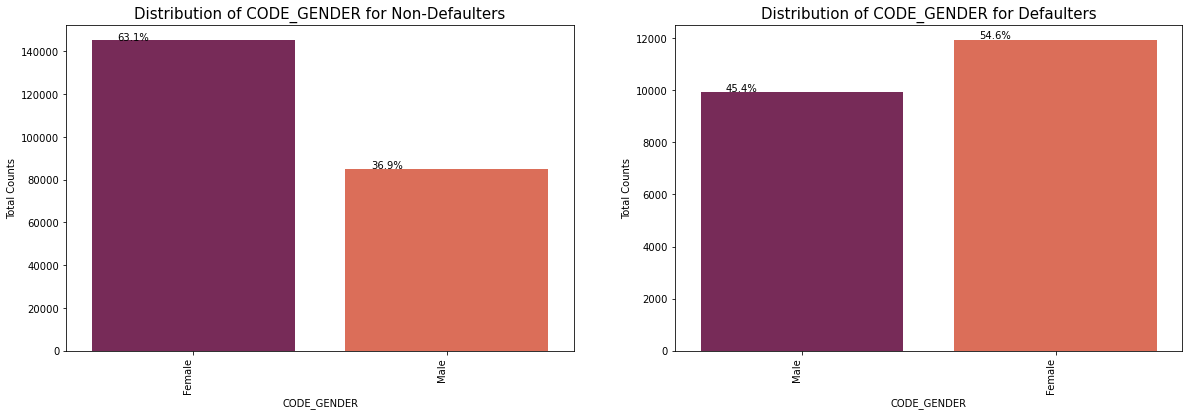

In [70]:
plot("CODE_GENDER")

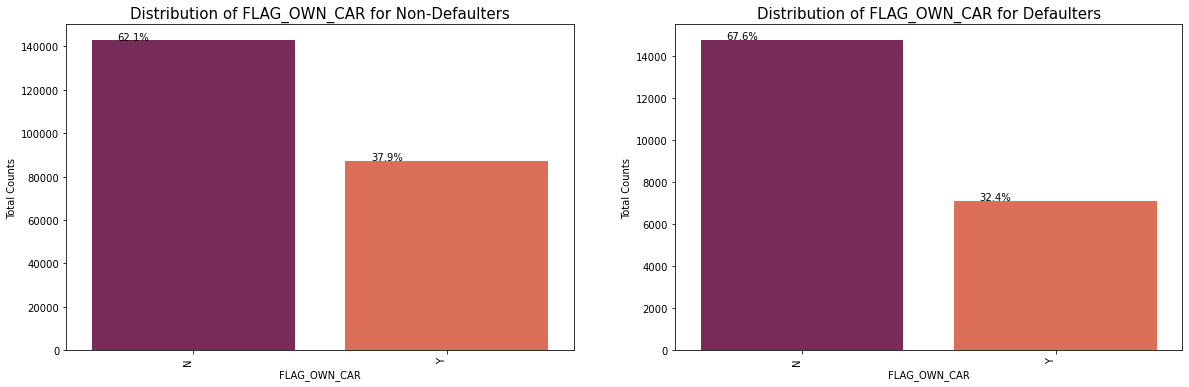

In [71]:
plot("FLAG_OWN_CAR")

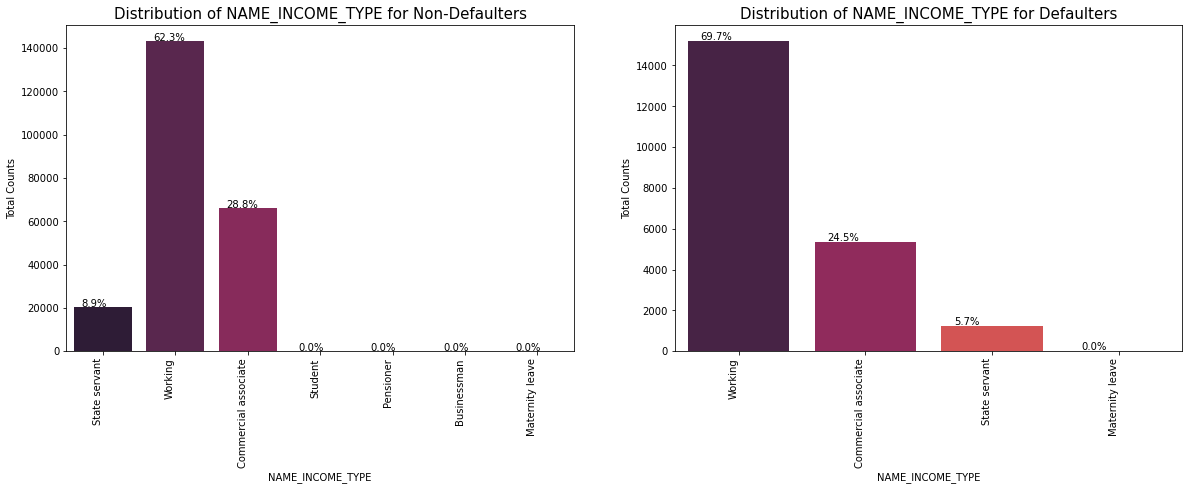

In [72]:
plot('NAME_INCOME_TYPE')

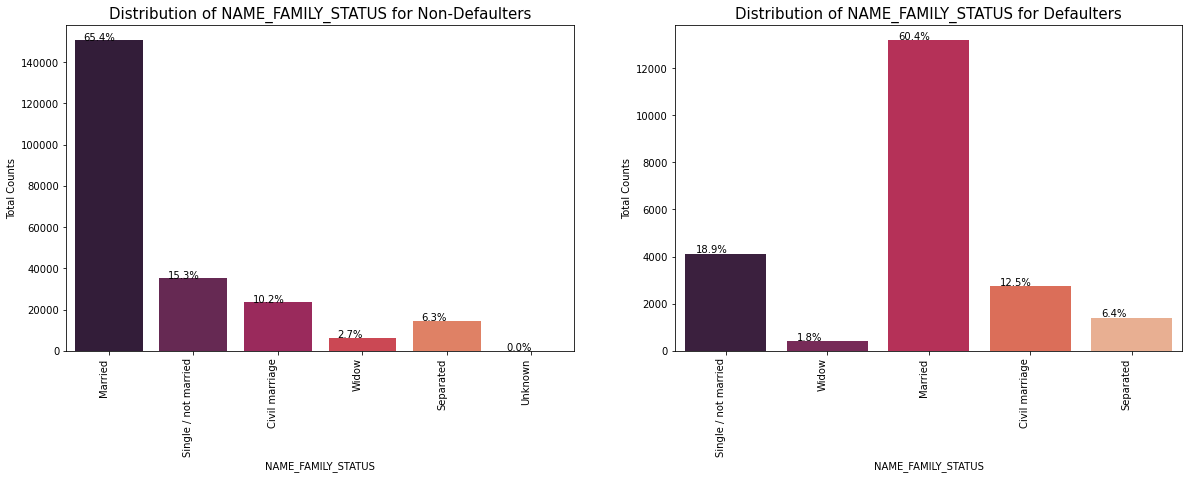

In [73]:
plot('NAME_FAMILY_STATUS')

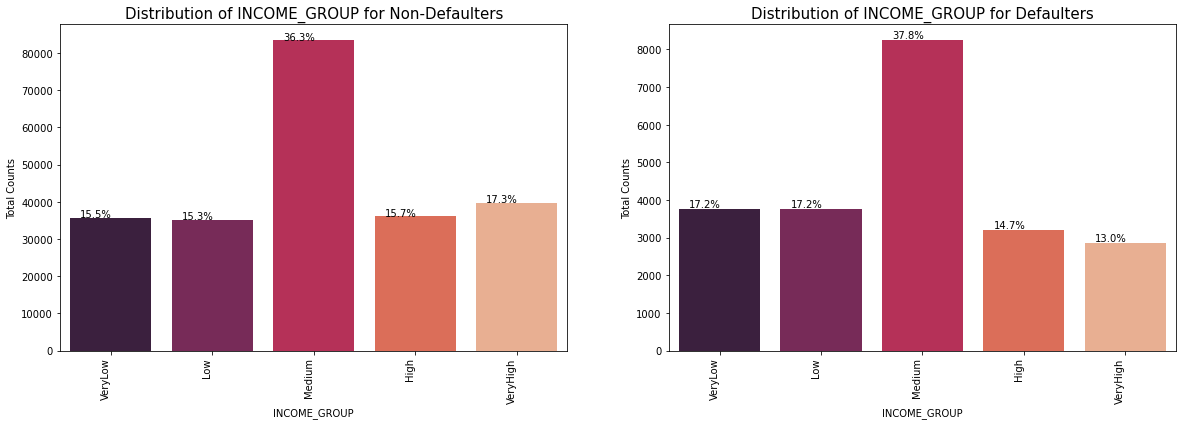

In [74]:
plot('INCOME_GROUP')

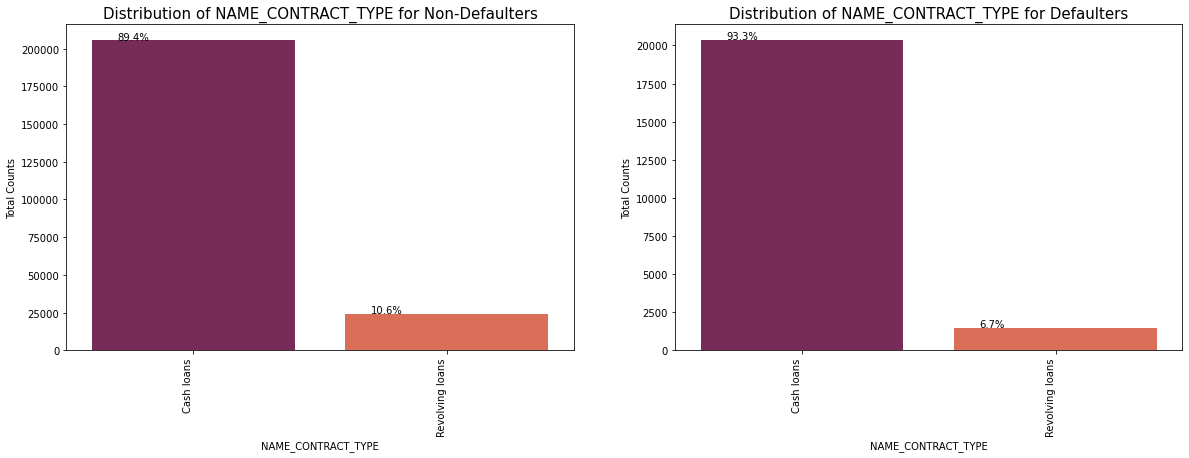

In [75]:
plot('NAME_CONTRACT_TYPE')

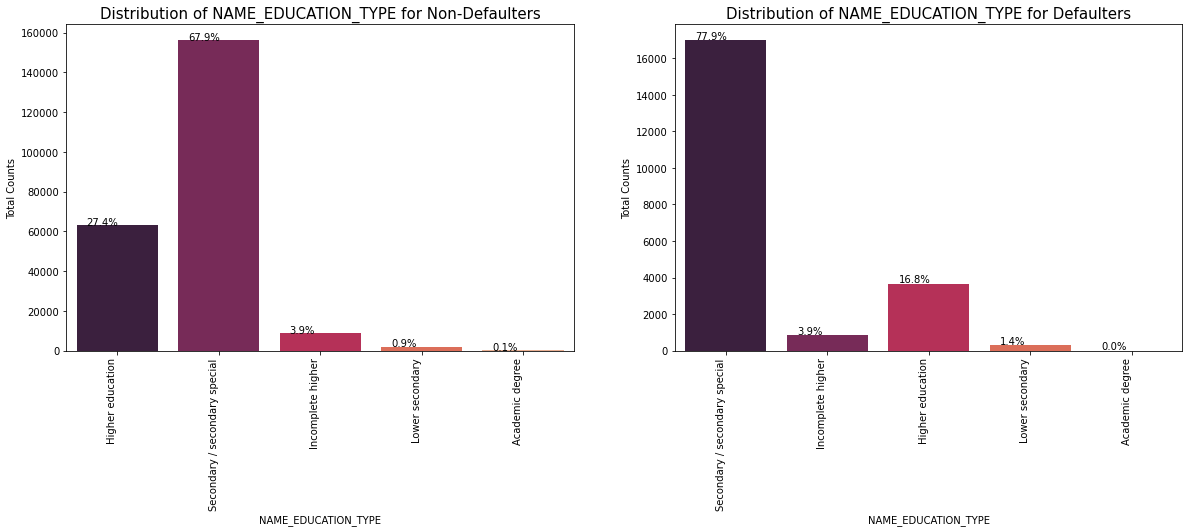

In [76]:
plot('NAME_EDUCATION_TYPE')

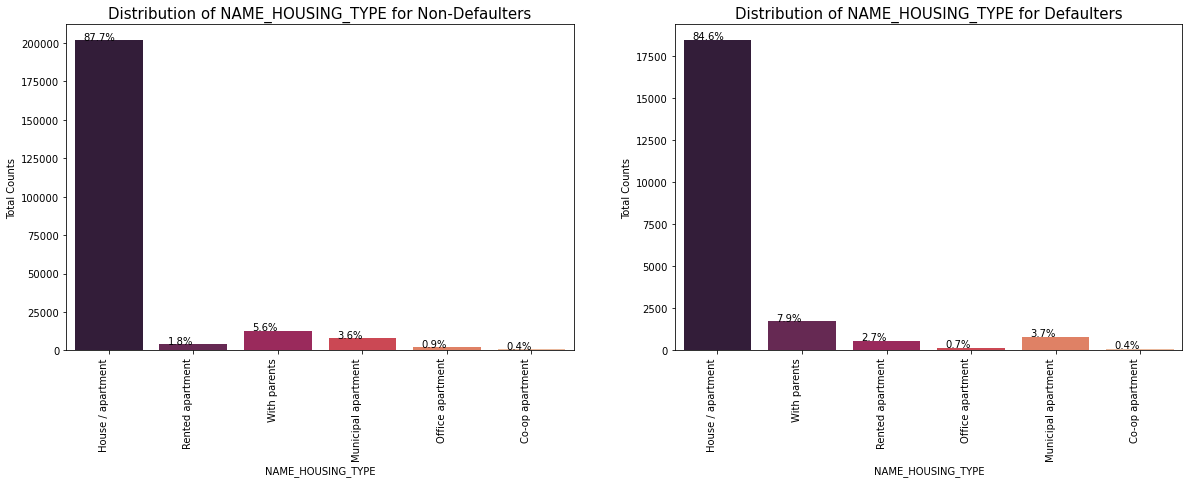

In [77]:
plot('NAME_HOUSING_TYPE')

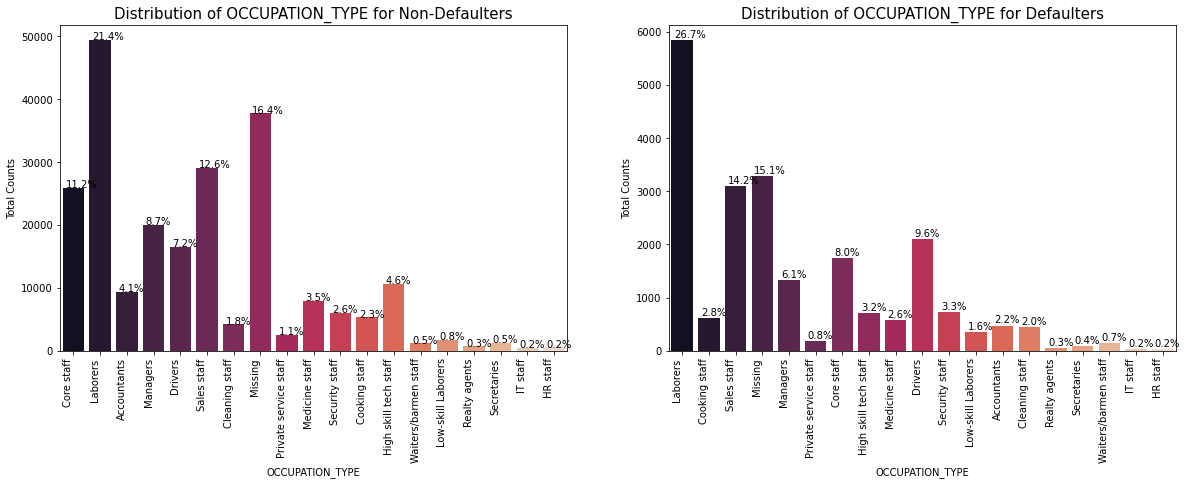

In [78]:
plot('OCCUPATION_TYPE')

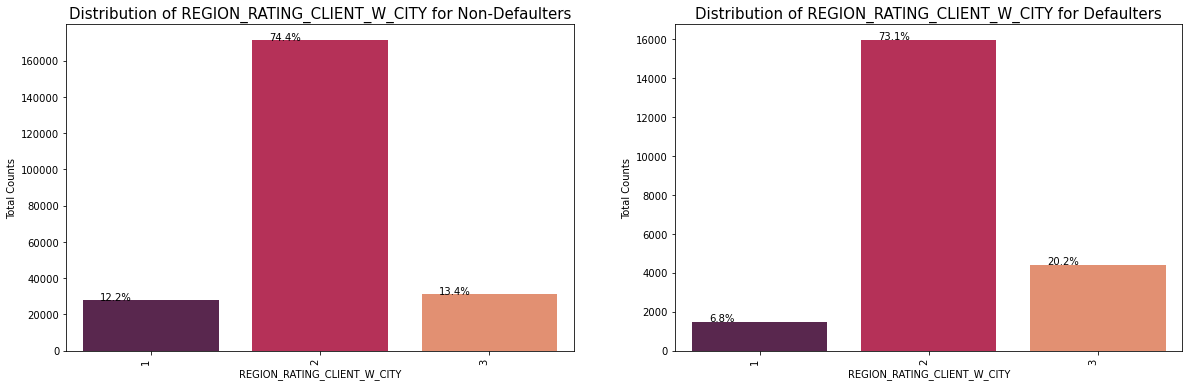

In [79]:
plot("REGION_RATING_CLIENT_W_CITY")

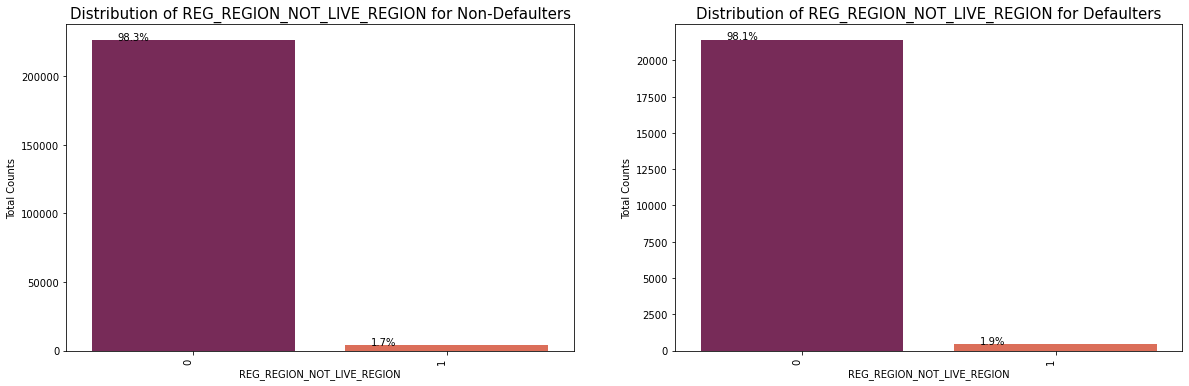

In [80]:
plot("REG_REGION_NOT_LIVE_REGION")

### Few important observations

1.Female defaulters are more than male since more female are applying for loans.
2.Rate of default of people having car is low compared to people who don't.
3.Chances of defaulting of income type-Working is more whereas State servants default very less..
4.Married people take more loans but risk of defaulting lies more with single/not married.
5.People with house tend to apply for more loans but people staying with parents tend to default more.
6.Age group 25 to 30 tend to default more.
7.Very high income group tend to default less, whereas low income group has high chances of defaulting.
8.Higher educated clients are less likely to default and secondary educated clients are more likely to default.
9.We can observe that people living in better areas(Rating 3) tend contribute more to the defaulters by their We can infer that people living in better areas(Rating 3) tend contribute more to the defaulters by their weightage.
10.Labourers having more weightage tend to default more but sales staff, core staff and drivers tend to default more.

## Data Analysis For Previous Application Data

### Importing the "application_data" csv file

In [81]:
data_prev= pd.read_csv("previous_application.csv")
data_prev.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,Y,1,NaN,NaN,NaN,Everyday expenses,Approved,-684,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Canceled,-14,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Canceled,-21,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-386,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-57,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
data_prev.shape

(1670214, 37)

In [83]:
## Here we will check the percentage of nan values present in each feature
## 1-step make the list of features which has missing values

f_with_na=[features for features in data_prev.columns if data_prev[features].isnull().sum()>1]
len(f_with_na)

15

In [84]:
## 2-step print the feature name and the percentage of missing values

for feature in f_with_na:
    print(feature, np.round(data_prev[feature].isnull().mean()*100, 2),  ' % missing values')

AMT_ANNUITY 22.29  % missing values
AMT_DOWN_PAYMENT 53.64  % missing values
AMT_GOODS_PRICE 23.08  % missing values
RATE_DOWN_PAYMENT 53.64  % missing values
RATE_INTEREST_PRIMARY 99.64  % missing values
RATE_INTEREST_PRIVILEGED 99.64  % missing values
NAME_TYPE_SUITE 49.12  % missing values
CNT_PAYMENT 22.29  % missing values
PRODUCT_COMBINATION 0.02  % missing values
DAYS_FIRST_DRAWING 40.3  % missing values
DAYS_FIRST_DUE 40.3  % missing values
DAYS_LAST_DUE_1ST_VERSION 40.3  % missing values
DAYS_LAST_DUE 40.3  % missing values
DAYS_TERMINATION 40.3  % missing values
NFLAG_INSURED_ON_APPROVAL 40.3  % missing values


## Listing the null values columns having more than 50%

In [85]:
empcol=data_prev.isnull().sum()/len(data_prev)*100
empcol=empcol[empcol.values>=50]
empcol

AMT_DOWN_PAYMENT            53.636480
RATE_DOWN_PAYMENT           53.636480
RATE_INTEREST_PRIMARY       99.643698
RATE_INTEREST_PRIVILEGED    99.643698
dtype: float64

### Removing those 4 columns

In [86]:
a = empcol[empcol.values>=50]
a

AMT_DOWN_PAYMENT            53.636480
RATE_DOWN_PAYMENT           53.636480
RATE_INTEREST_PRIMARY       99.643698
RATE_INTEREST_PRIVILEGED    99.643698
dtype: float64

In [87]:
empcol = a.index
data_prev.drop(labels=empcol,axis=1,inplace=True)
print(len(empcol))

4


In [88]:
f_with_na=[features for features in data_prev.columns if data_prev[features].isnull().sum()>1]
len(f_with_na)

11

In [89]:
data_prev.shape

(1670214, 33)

# Numerical Variables

In [90]:
# list of numerical variables
num_features = [feature for feature in data_prev.columns if data_prev[feature].dtypes != 'O']
print('Number of numerical variables: ', len(num_features))
# visualise the numerical variables
data_prev[num_features].head()

Number of numerical variables:  17


,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,1730.430,17145.0,17145.0,17145.0,15,1,-73,35,12.0,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,25188.615,607500.0,679671.0,607500.0,11,1,-164,-1,36.0,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,15060.735,112500.0,136444.5,112500.0,11,1,-301,-1,12.0,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,47041.335,450000.0,470790.0,450000.0,7,1,-512,-1,12.0,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,31924.395,337500.0,404055.0,337500.0,9,1,-781,-1,24.0,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
## Now lets check for numerical variables the contains missing values
num_with_nan=[feature for feature in data_prev.columns if data_prev[feature].isnull().sum()>1 and data_prev[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values
print(len(num_with_nan))

for feature in num_with_nan:
    print("{}: {}% missing value".format(feature,np.around(data_prev[feature].isnull().mean()*100,4)))

9
AMT_ANNUITY: 22.2867% missing value
AMT_GOODS_PRICE: 23.0818% missing value
CNT_PAYMENT: 22.2864% missing value
DAYS_FIRST_DRAWING: 40.2981% missing value
DAYS_FIRST_DUE: 40.2981% missing value
DAYS_LAST_DUE_1ST_VERSION: 40.2981% missing value
DAYS_LAST_DUE: 40.2981% missing value
DAYS_TERMINATION: 40.2981% missing value
NFLAG_INSURED_ON_APPROVAL: 40.2981% missing value


### Checking outliers using boxplot

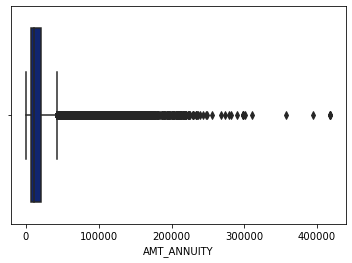

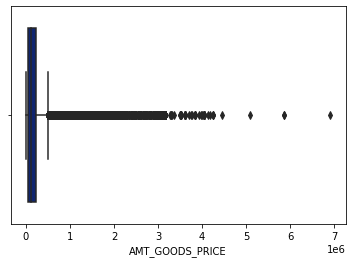

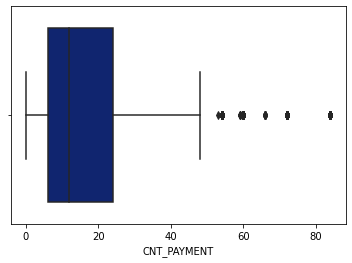

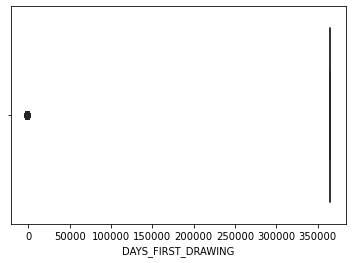

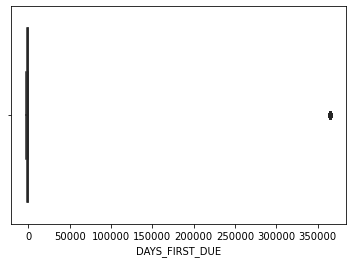

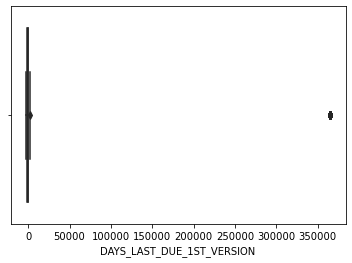

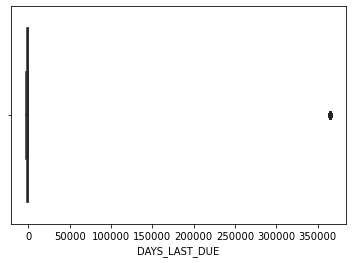

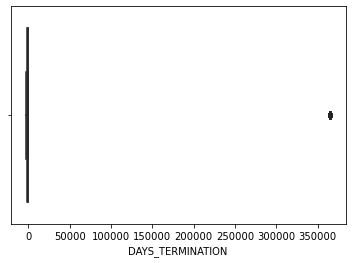

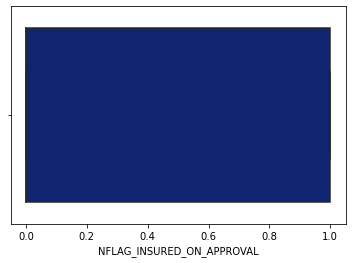

In [92]:
for i in num_with_nan:
    sns.boxplot(data=data_prev, x=i)
    plt.show()

In [93]:
## Replacing the numerical Missing Values

for feature in num_with_nan:
    ## We will replace by using median since there are outliers
    median_value=data_prev[feature].median()
    
    ## create a new feature to capture nan values
    
    data_prev[feature].fillna(median_value,inplace=True)
    
data_prev[num_with_nan].isnull().sum()

AMT_ANNUITY                  0
AMT_GOODS_PRICE              0
CNT_PAYMENT                  0
DAYS_FIRST_DRAWING           0
DAYS_FIRST_DUE               0
DAYS_LAST_DUE_1ST_VERSION    0
DAYS_LAST_DUE                0
DAYS_TERMINATION             0
NFLAG_INSURED_ON_APPROVAL    0
dtype: int64

# Categorical Variables

In [94]:
cat_features=[feature for feature in data_prev.columns if data_prev[feature].dtypes=='O']

print('Number of categorical variables: ', len(cat_features))

# visualise the numerical variables
data_prev[cat_features].head()

Number of categorical variables:  16


,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,Consumer loans,SATURDAY,Y,XAP,Approved,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,Connectivity,middle,POS mobile with interest
1,Cash loans,THURSDAY,Y,XNA,Approved,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,XNA,low_action,Cash X-Sell: low
2,Cash loans,TUESDAY,Y,XNA,Approved,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,high,Cash X-Sell: high
3,Cash loans,MONDAY,Y,XNA,Approved,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,middle,Cash X-Sell: middle
4,Cash loans,THURSDAY,Y,Repairs,Refused,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,XNA,high,Cash Street: high


In [95]:
for feature in cat_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(data_prev[feature].unique())))

The feature is NAME_CONTRACT_TYPE and number of categories are 4
The feature is WEEKDAY_APPR_PROCESS_START and number of categories are 7
The feature is FLAG_LAST_APPL_PER_CONTRACT and number of categories are 2
The feature is NAME_CASH_LOAN_PURPOSE and number of categories are 25
The feature is NAME_CONTRACT_STATUS and number of categories are 4
The feature is NAME_PAYMENT_TYPE and number of categories are 4
The feature is CODE_REJECT_REASON and number of categories are 9
The feature is NAME_TYPE_SUITE and number of categories are 8
The feature is NAME_CLIENT_TYPE and number of categories are 4
The feature is NAME_GOODS_CATEGORY and number of categories are 28
The feature is NAME_PORTFOLIO and number of categories are 5
The feature is NAME_PRODUCT_TYPE and number of categories are 3
The feature is CHANNEL_TYPE and number of categories are 8
The feature is NAME_SELLER_INDUSTRY and number of categories are 11
The feature is NAME_YIELD_GROUP and number of categories are 5
The feature is 

In [96]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan=[feature for feature in data_prev.columns if data_prev[feature].isnull().sum()>1 and data_prev[feature].dtypes=='O']

## We will print the numerical nan variables and percentage of missing values
print(len(features_nan))

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(data_prev[feature].isnull().mean()*100,4)))

2
NAME_TYPE_SUITE: 49.1198% missing values
PRODUCT_COMBINATION: 0.0207% missing values


In [97]:
## Replace missing value with a new label
def replace_cat_feature(data_prev,features_nan):
    data=data_prev.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

data_prev=replace_cat_feature(data_prev,features_nan)

data_prev[features_nan].isnull().sum()

NAME_TYPE_SUITE        0
PRODUCT_COMBINATION    0
dtype: int64

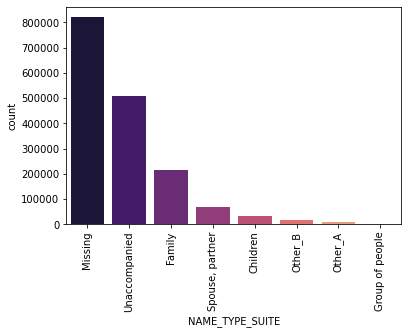

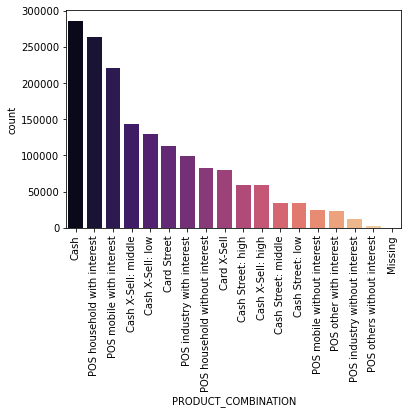

In [98]:
for i in features_nan:
    sns.countplot(data = data_prev, x= i, order=data_prev[i].value_counts().index, palette='magma') 
    plt.xticks(rotation = 90)
    plt.show()

### Few importnat observations

Most of the client came unaccompanied.
The highest frequency of product combination applied for is cash and then Point of sale of household with interest.

##### Now there are no null values in the dataframe data_appli

In [99]:
f_with_na=[features for features in data_prev.columns if data_prev[features].isnull().sum()>1]
len(f_with_na)

0

## Univariate Analysis

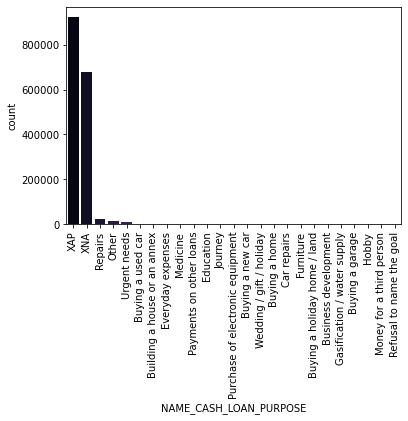

In [100]:
sns.countplot(data = data_prev, x= "NAME_CASH_LOAN_PURPOSE", order=data_prev["NAME_CASH_LOAN_PURPOSE"].value_counts().index, palette='magma') 
plt.xticks(rotation = 90)
plt.show()

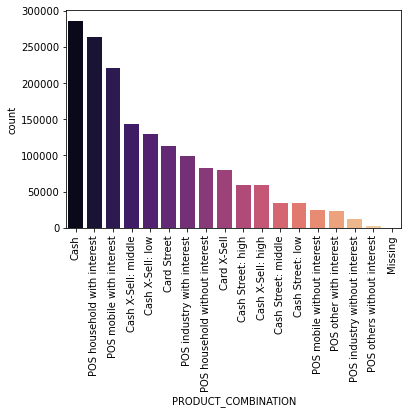

In [101]:
#PRODUCT_COMBINATION
sns.countplot(data = data_prev, x= "PRODUCT_COMBINATION", order=data_prev["PRODUCT_COMBINATION"].value_counts().index, palette='magma') 
plt.xticks(rotation = 90)
plt.show()

In [102]:
data_prev['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100

Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: NAME_CONTRACT_STATUS, dtype: float64

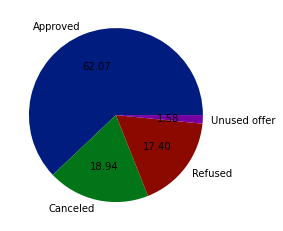

In [103]:
#'NAME_CONTRACT_STATUS'
plt.pie(data_prev['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100,labels=['Approved','Canceled', 'Refused', 'Unused offer'],autopct='%.2f')
#plt.title('TARGET Variable - DEFAULTER Vs NONDEFAULTER')
plt.show()

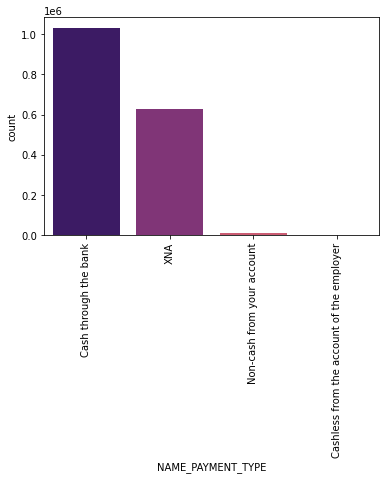

In [104]:
#NAME_PAYMENT_TYPE
sns.countplot(data = data_prev, x= "NAME_PAYMENT_TYPE", order=data_prev["NAME_PAYMENT_TYPE"].value_counts().index, palette='magma') 
plt.xticks(rotation = 90)
plt.show()

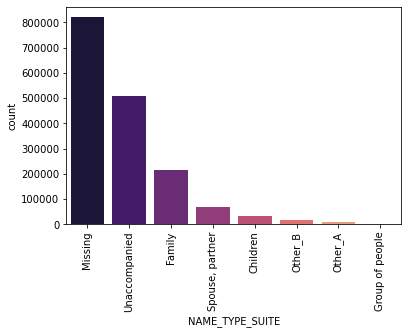

In [105]:
#NAME_TYPE_SUITE
sns.countplot(data = data_prev, x= "NAME_TYPE_SUITE", order=data_prev["NAME_TYPE_SUITE"].value_counts().index, palette='magma') 
plt.xticks(rotation = 90)
plt.show()

In [106]:
data_prev['NAME_CLIENT_TYPE'].value_counts(normalize=True)*100

Repeater     73.718757
New          18.043376
Refreshed     8.121654
XNA           0.116213
Name: NAME_CLIENT_TYPE, dtype: float64

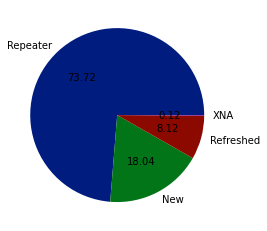

In [107]:
#NAME_CLIENT_TYPE
plt.pie(data_prev['NAME_CLIENT_TYPE'].value_counts(normalize=True)*100,labels=['Repeater','New', 'Refreshed', 'XNA'],autopct='%.2f')
#plt.title('TARGET Variable - DEFAULTER Vs NONDEFAULTER')
plt.show()

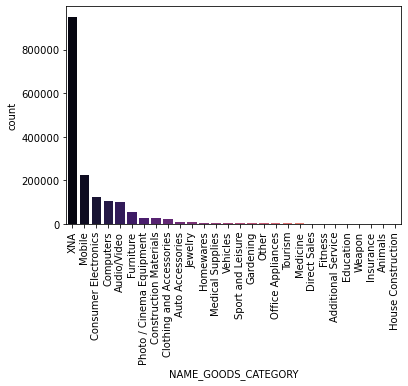

In [108]:
#NAME_GOODS_CATEGORY
sns.countplot(data = data_prev, x= "NAME_GOODS_CATEGORY", order=data_prev["NAME_GOODS_CATEGORY"].value_counts().index, palette='magma') 
plt.xticks(rotation = 90)
plt.show()

In [109]:
data_prev['NAME_PORTFOLIO'].value_counts(normalize=True)*100

POS      41.372603
Cash     27.634962
XNA      22.286366
Cards     8.680624
Cars      0.025446
Name: NAME_PORTFOLIO, dtype: float64

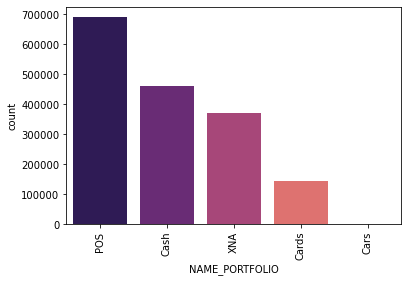

In [110]:
sns.countplot(data = data_prev, x= "NAME_PORTFOLIO", order=data_prev["NAME_PORTFOLIO"].value_counts().index, palette='magma') 
plt.xticks(rotation = 90)
plt.show()

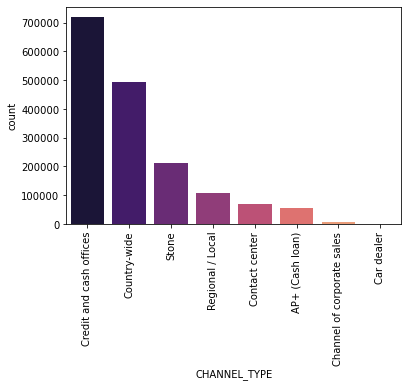

In [111]:
#CHANNEL_TYPE
sns.countplot(data = data_prev, x= "CHANNEL_TYPE", order=data_prev["CHANNEL_TYPE"].value_counts().index, palette='magma') 
plt.xticks(rotation = 90)
plt.show()

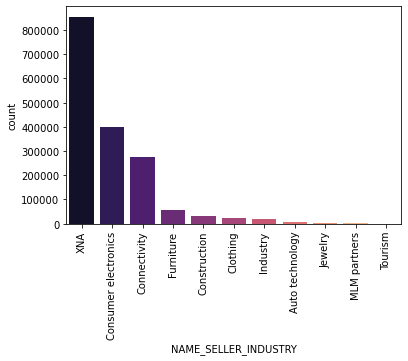

In [112]:
#NAME_SELLER_INDUSTRY
sns.countplot(data = data_prev, x= "NAME_SELLER_INDUSTRY", order=data_prev["NAME_SELLER_INDUSTRY"].value_counts().index, palette='magma') 
plt.xticks(rotation = 90)
plt.show()

In [113]:
data_prev['NFLAG_INSURED_ON_APPROVAL'].value_counts(normalize=True)*100

0.0    80.14494
1.0    19.85506
Name: NFLAG_INSURED_ON_APPROVAL, dtype: float64

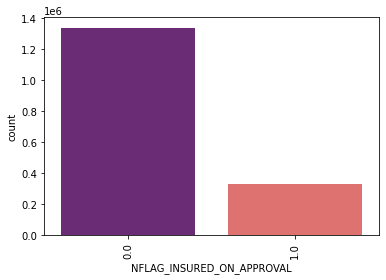

In [114]:
#NFLAG_INSURED_ON_APPROVAL
sns.countplot(data = data_prev, x= "NFLAG_INSURED_ON_APPROVAL", order=data_prev["NFLAG_INSURED_ON_APPROVAL"].value_counts().index, palette='magma') 
plt.xticks(rotation = 90)
plt.show()

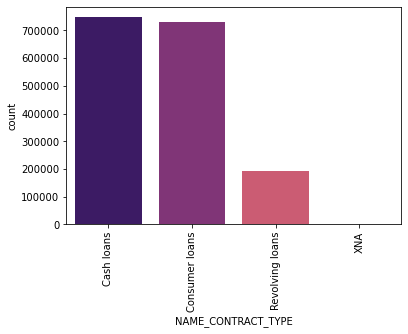

In [115]:
sns.countplot(data = data_prev, x= "NAME_CONTRACT_TYPE", order=data_prev["NAME_CONTRACT_TYPE"].value_counts().index, palette='magma') 
plt.xticks(rotation = 90)
plt.show()

### Few important observations

1.The highest frequency of cash loan purpose is repairs.
2.62.07% of the clients got the laon approval.
3.Max clients choose cash as the payment type.
4.Most of the client came unaccompanied. 
5.The highest frequency of product combination applied for is cash and then Point of sale of household with interest.
6.Most of the clients(73.72%) opting for loan are repeater(previosly applied for loan- old client).
7.Most of the previous application was for POS and then cash.
8.The bank acquired most the clients through credit and cash offices and then country wide.
9.The highest frrquency of the seller industry is Consumer electronics.
10.Most of the clients did not request for insurance(80.14%).
11.Cash loan contract has the highest frequency followed by Consumer type.

## Bivariate/Multivariate Analysis

In [116]:
def plot_bi(var):

    plt.style.use('seaborn-dark-palette')
    #sns.despine
    fig,ax = plt.subplots(1,1,figsize=(15,5))
    sns.countplot(data = data_prev, x= var, order=data_prev[var].value_counts().index, ax=ax, hue='NAME_CONTRACT_STATUS', palette='magma') 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.show()

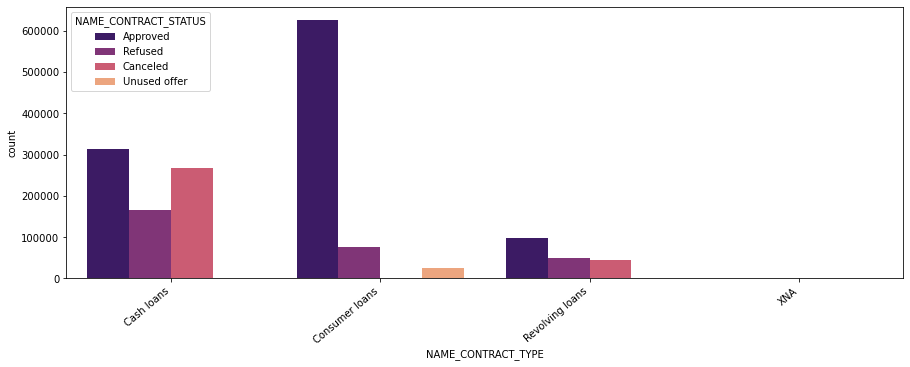

In [117]:
plot_bi('NAME_CONTRACT_TYPE')

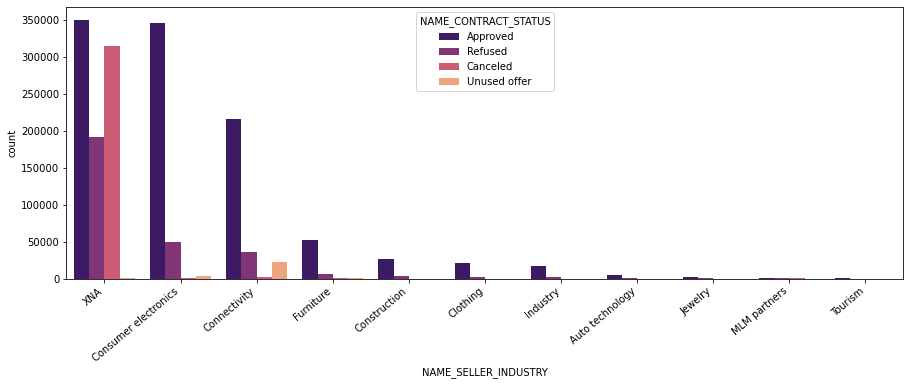

In [118]:
plot_bi("NAME_SELLER_INDUSTRY")

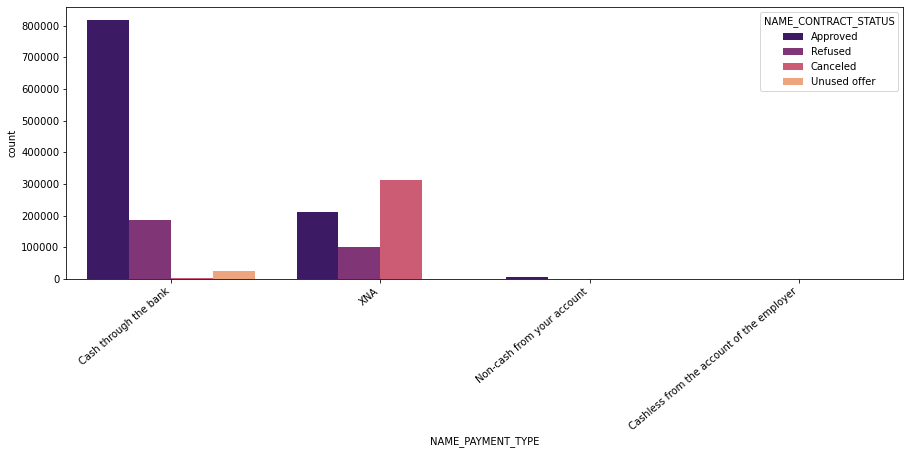

In [119]:
plot_bi('NAME_PAYMENT_TYPE')

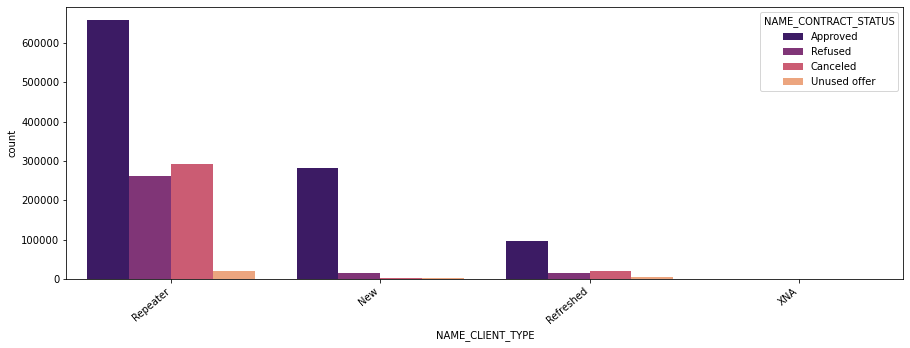

In [120]:
plot_bi('NAME_CLIENT_TYPE')

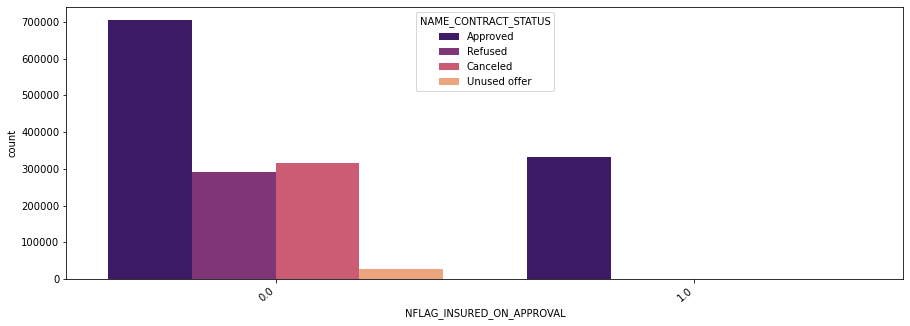

In [121]:
plot_bi('NFLAG_INSURED_ON_APPROVAL')

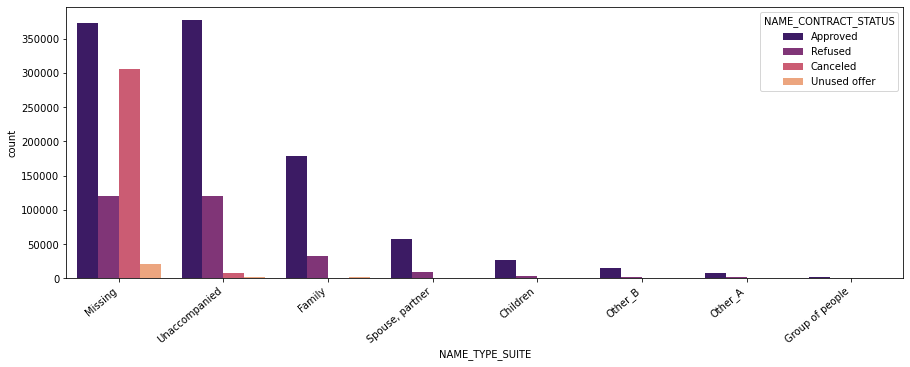

In [122]:
plot_bi('NAME_TYPE_SUITE')

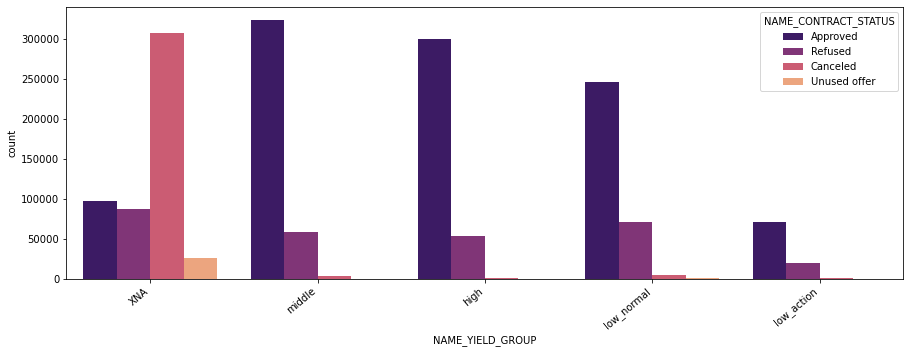

In [123]:
plot_bi('NAME_YIELD_GROUP')

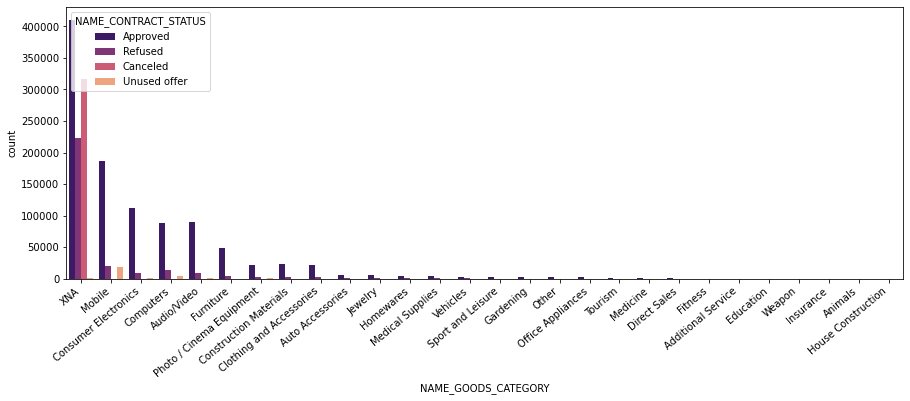

In [124]:
plot_bi('NAME_GOODS_CATEGORY')

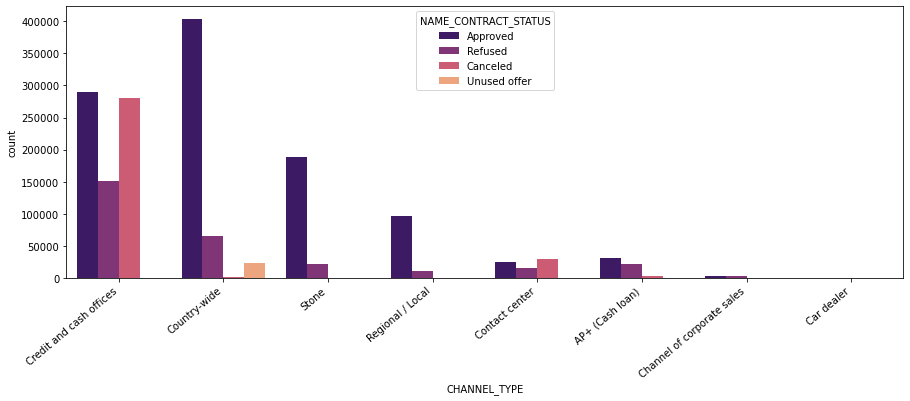

In [125]:
plot_bi('CHANNEL_TYPE')

### Few important observations

1.Consumer loans gets the maximum approval followed by cash loans.
2.Seller industry whose type is consumer electronics gets the maximum approval.
3.Payment type cash through the bank gets the maximum approval.
4.Since the repeater client type has maximum weightage so it gets maximum approval and rejection. But a bit of risk is associated with the refreshed client type.
5.Clients who requested for insurance has got all of their loans approved whereas who didnot got refused a lot also.
6.Clients who came unaccompanied has got the highest approval followed by who came with family.
7.Clients acquired by channel type country wide has the highest approval rate whereas high risk is associated with clients acquired from credit and cash offices.

<Figure size 1440x576 with 0 Axes>

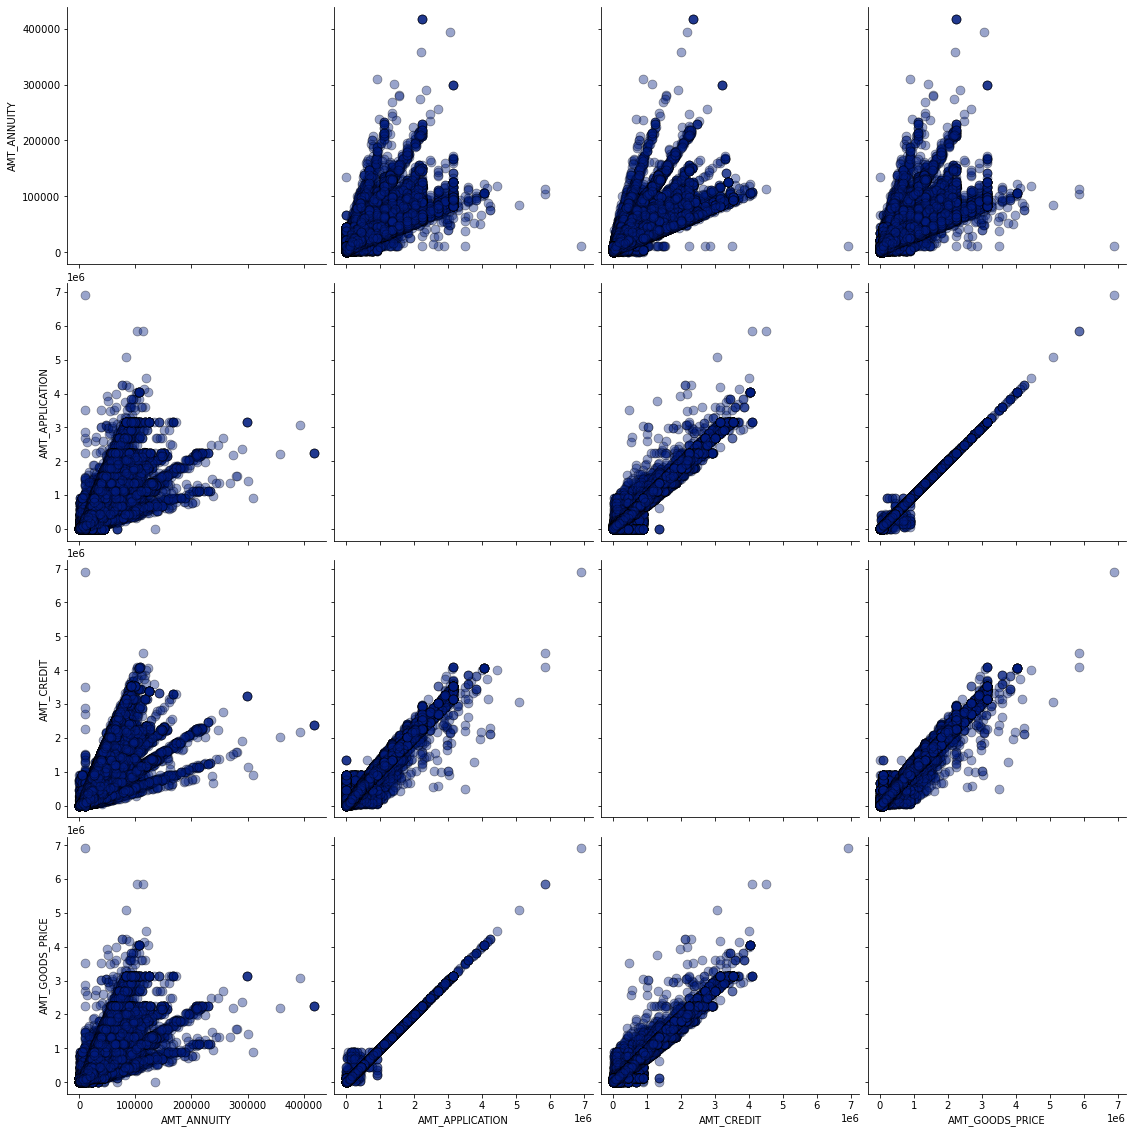

In [126]:
plt.figure(figsize=[20,8])
sns.pairplot(data_prev[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','NAME_CONTRACT_STATUS']],diag_kind = 'scatter', 
             plot_kws = {'alpha': 0.4, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()

### Few important observations

The previous application's annuity has a very strong and favourable impact on the following factors: (1) The amount of credit that the client requested on the prior application; (2) The final credit amount on the prior application that the bank approved; and (3) The price of the goods that the client requested on the prior application.

The goods price of the goods that the customer requested on the prior application had a significant impact on how much credit the client had requested.

The application amount and the price of the items the client requested in the prior application have a significant impact on the final credit amount granted to the customer following approval.

In [127]:
def plot_by_cata_nume(c, n):

    plt.style.use('seaborn-deep')
    sns.despine
    fig,ax = plt.subplots(1,1,figsize=(10,8))
    
    sns.boxenplot(x=c,y = n, data=data_prev)
    ax.set_ylabel(f'{n}')
    ax.set_xlabel(f'{c}')

    ax.set_title(f'{c} Vs {n}',fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
     
    plt.show()

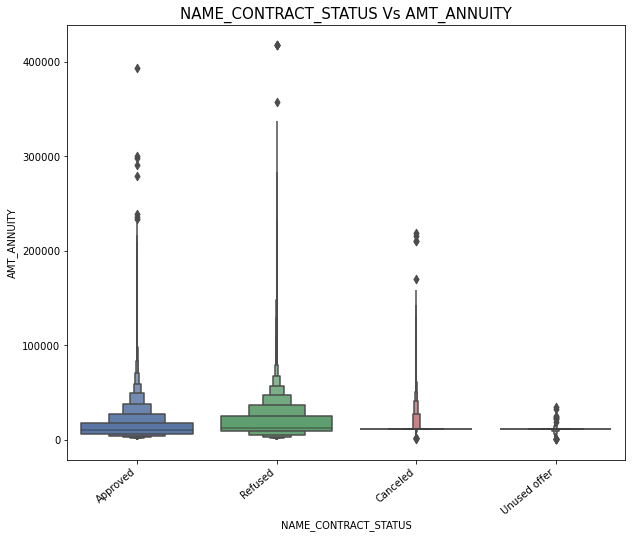

In [128]:
plot_by_cata_nume('NAME_CONTRACT_STATUS', 'AMT_ANNUITY')

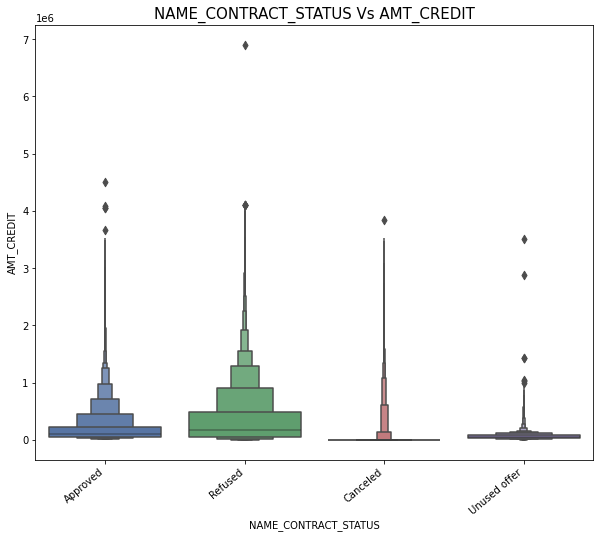

In [129]:
plot_by_cata_nume('NAME_CONTRACT_STATUS', 'AMT_CREDIT')

### Few important observations

We can notice that loan applications for borrowers with lower AMT ANNUITY frequently get rejected or never used. We also see that applications with excessive AMT ANNUITY were refused more frequently than those without. The majority of the time, it gets cancelled or goes unused when the AMT CREDIT is too low.

# Merging the files and analyzing the data

In [130]:
## Merging the two files to do some analysis
NewDf = pd.merge(data_appli, data_prev, how='left', on=['SK_ID_CURR'])

In [131]:
NewDf.shape

(1153732, 119)

In [132]:
NewDf.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_GROUP,CREDIT_GROUP,AMT_CREDIT_LAKHS,AMT_INCOME_TOTAL_LAKHS,AGE,AGE_GROUP,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,Male,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,High,Medium,4.07,2.02,25.0,"(20, 25]",1038818.0,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9.0,Y,1.0,XAP,Approved,-606.0,XNA,XAP,Missing,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,VeryHigh,VeryHigh,12.94,2.70,45.0,"(40, 45]",1810518.0,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12.0,Y,1.0,XNA,Approved,-746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,VeryHigh,VeryH

In [133]:
def plt_combined(x,y):
    # 100% bar chart
    plt.style.use('dark_background')
    sns.despine
    NewDat = NewDf.pivot_table(values='SK_ID_CURR', 
                      index=x,
                      columns=y,
                      aggfunc='count')
    NewDat=NewDat.div(NewDat.sum(axis=1),axis='rows')*100
    sns.set()
    NewDat.plot(kind='bar',stacked=True,figsize=(15,5))
    plt.title(f'Effect Of {x} on Loan Approval')
    plt.xlabel(f'{x}')
    plt.ylabel(f'{y}%')
    plt.show()

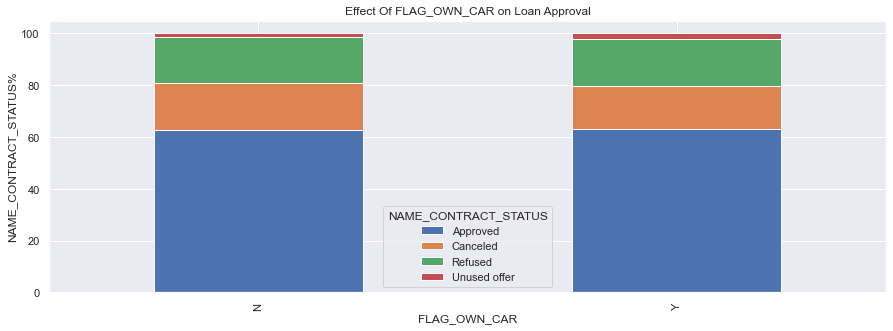

In [134]:
plt_combined('FLAG_OWN_CAR','NAME_CONTRACT_STATUS')

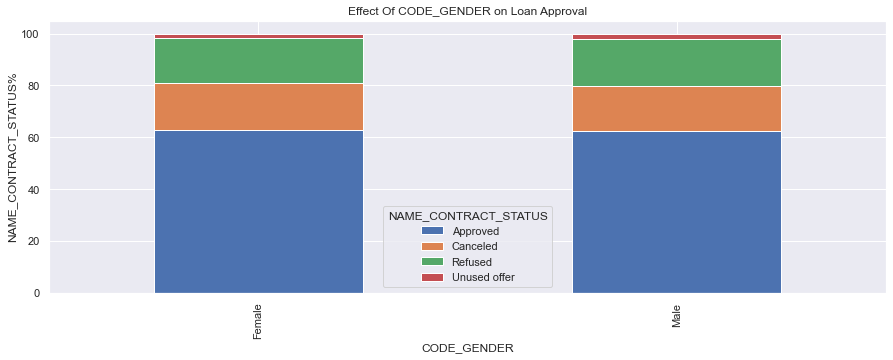

In [135]:
plt_combined('CODE_GENDER','NAME_CONTRACT_STATUS')

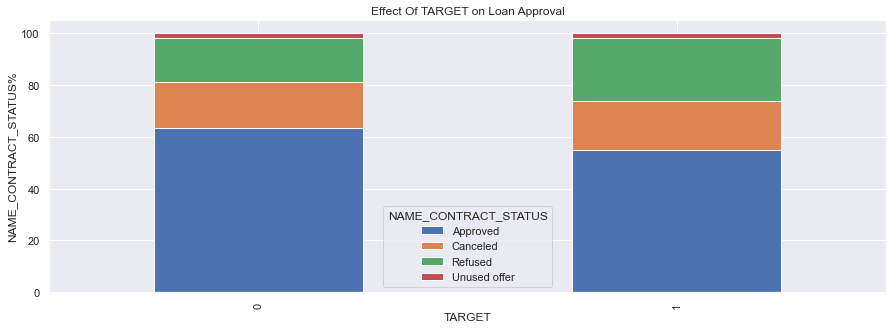

In [136]:
plt_combined('TARGET','NAME_CONTRACT_STATUS')

### Few important observations

1.We can see that having a car has no bearing on whether an application will be accepted or denied. However, as we just showed, those who own cars are less likely to default. When authorising a loan amount, the bank may give ownership of an automobile additional weight.
2.We can observe that the code gender has no bearing on whether an application is accepted or rejected.
But as we just showed, women are less likely to default than men are. When authorising a loan amount, the bank may give women greater weight.
3.We can observe that borrowers who received loan approval earlier experienced default less frequently than borrowers who received loan denial sooner.

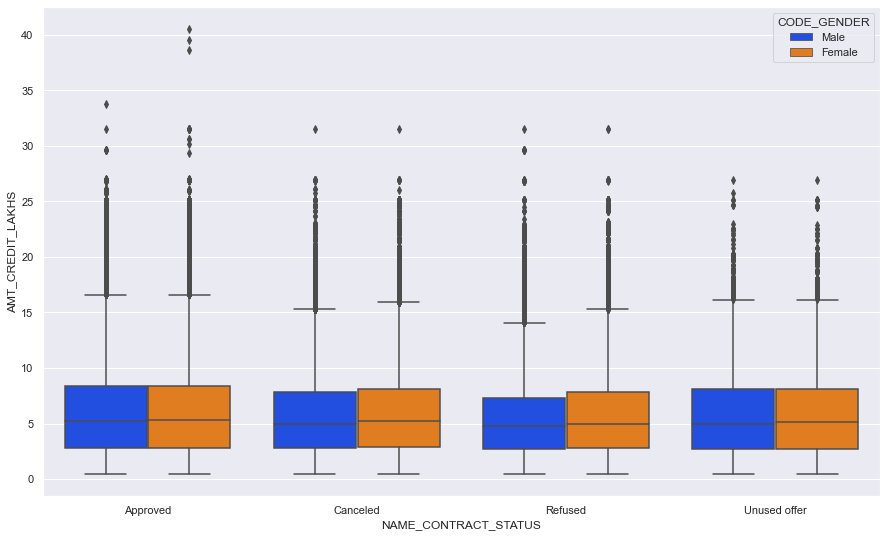

In [137]:
#"NAME_CONTRACT_STATUS"
plt.figure(figsize=(15,9))
sns.boxplot(x="NAME_CONTRACT_STATUS", y="AMT_CREDIT_LAKHS", data= NewDf, palette="bright", hue="CODE_GENDER")
plt.show()

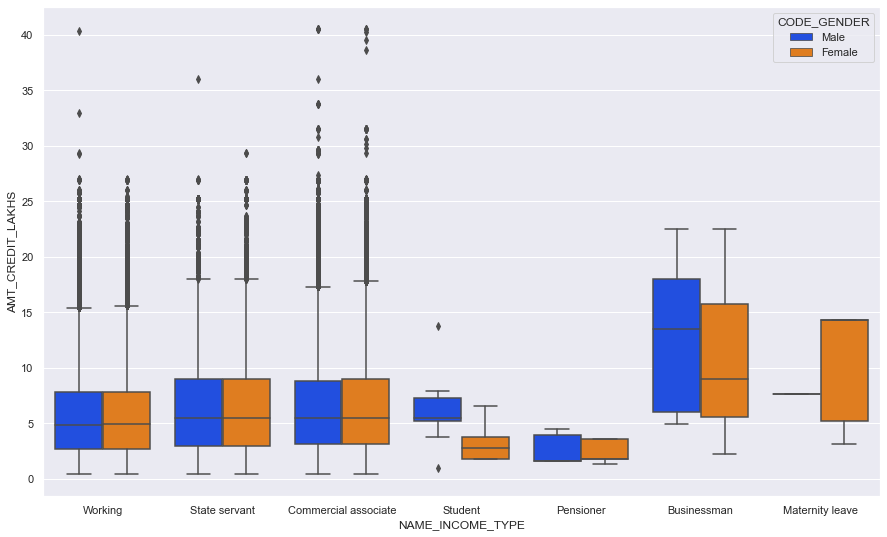

In [138]:
#NAME_INCOME_TYPE
plt.figure(figsize=(15,9))
sns.boxplot(x="NAME_INCOME_TYPE", y="AMT_CREDIT_LAKHS", data= NewDf, palette="bright", hue="CODE_GENDER")
plt.show()

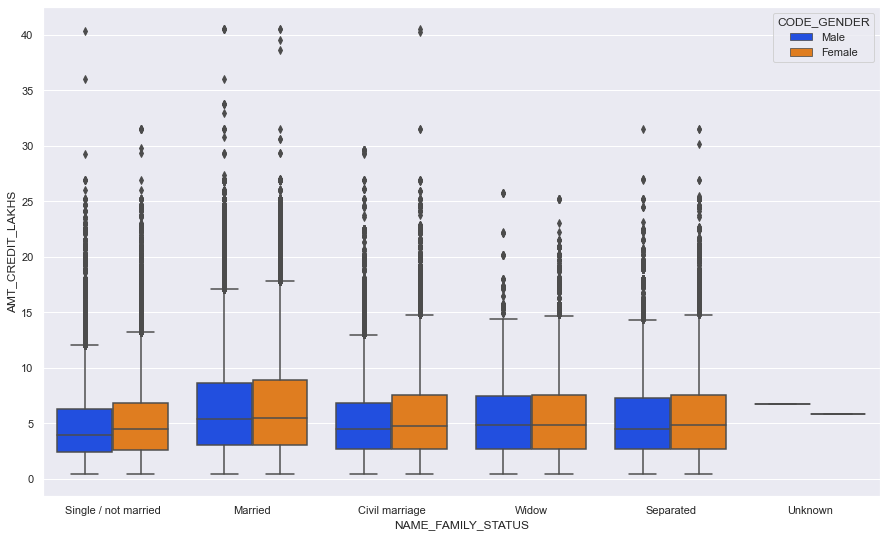

In [139]:
#NAME_FAMILY_STATUS
plt.figure(figsize=(15,9))
sns.boxplot(x="NAME_FAMILY_STATUS", y="AMT_CREDIT_LAKHS", data= NewDf, palette="bright", hue="CODE_GENDER")
plt.show()

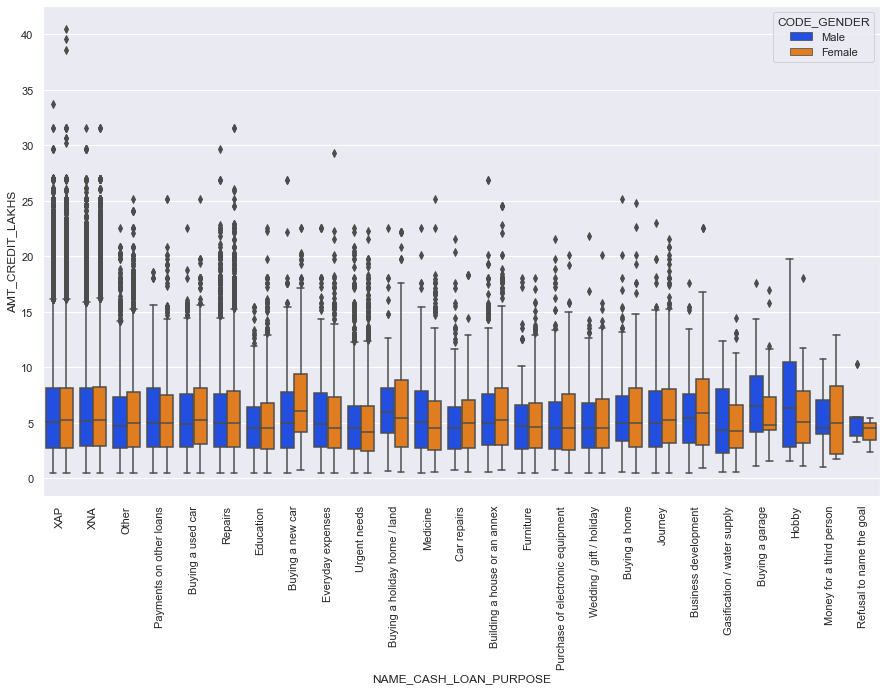

In [140]:
#NAME_CASH_LOAN_PURPOSE
plt.figure(figsize=(15,9))
sns.boxplot(x="NAME_CASH_LOAN_PURPOSE", y="AMT_CREDIT_LAKHS", data= NewDf, palette="bright", hue="CODE_GENDER")
plt.xticks(rotation = 90)
plt.show()

### Few important observations

1.Male and female gets almost same approval but the credit amount for female is more.On the other hand for a lower credit amount female gets more refused and cancalled than males.
2.Female commercial associate clients takes almost same amount of loan(AMOUNT CREDIT) as male. Whereas male State servant takes more amount of loan(AMOUNT CREDIT) than female.
3.Female who are single, married and had civil marriage are more in number than male. Single female take less loan than male. Married female take almost same amount of loan as male.Whereas female who had civil marriage takes more loan than male.
4.Cash loan purpose is highest for repairs taken more by female.

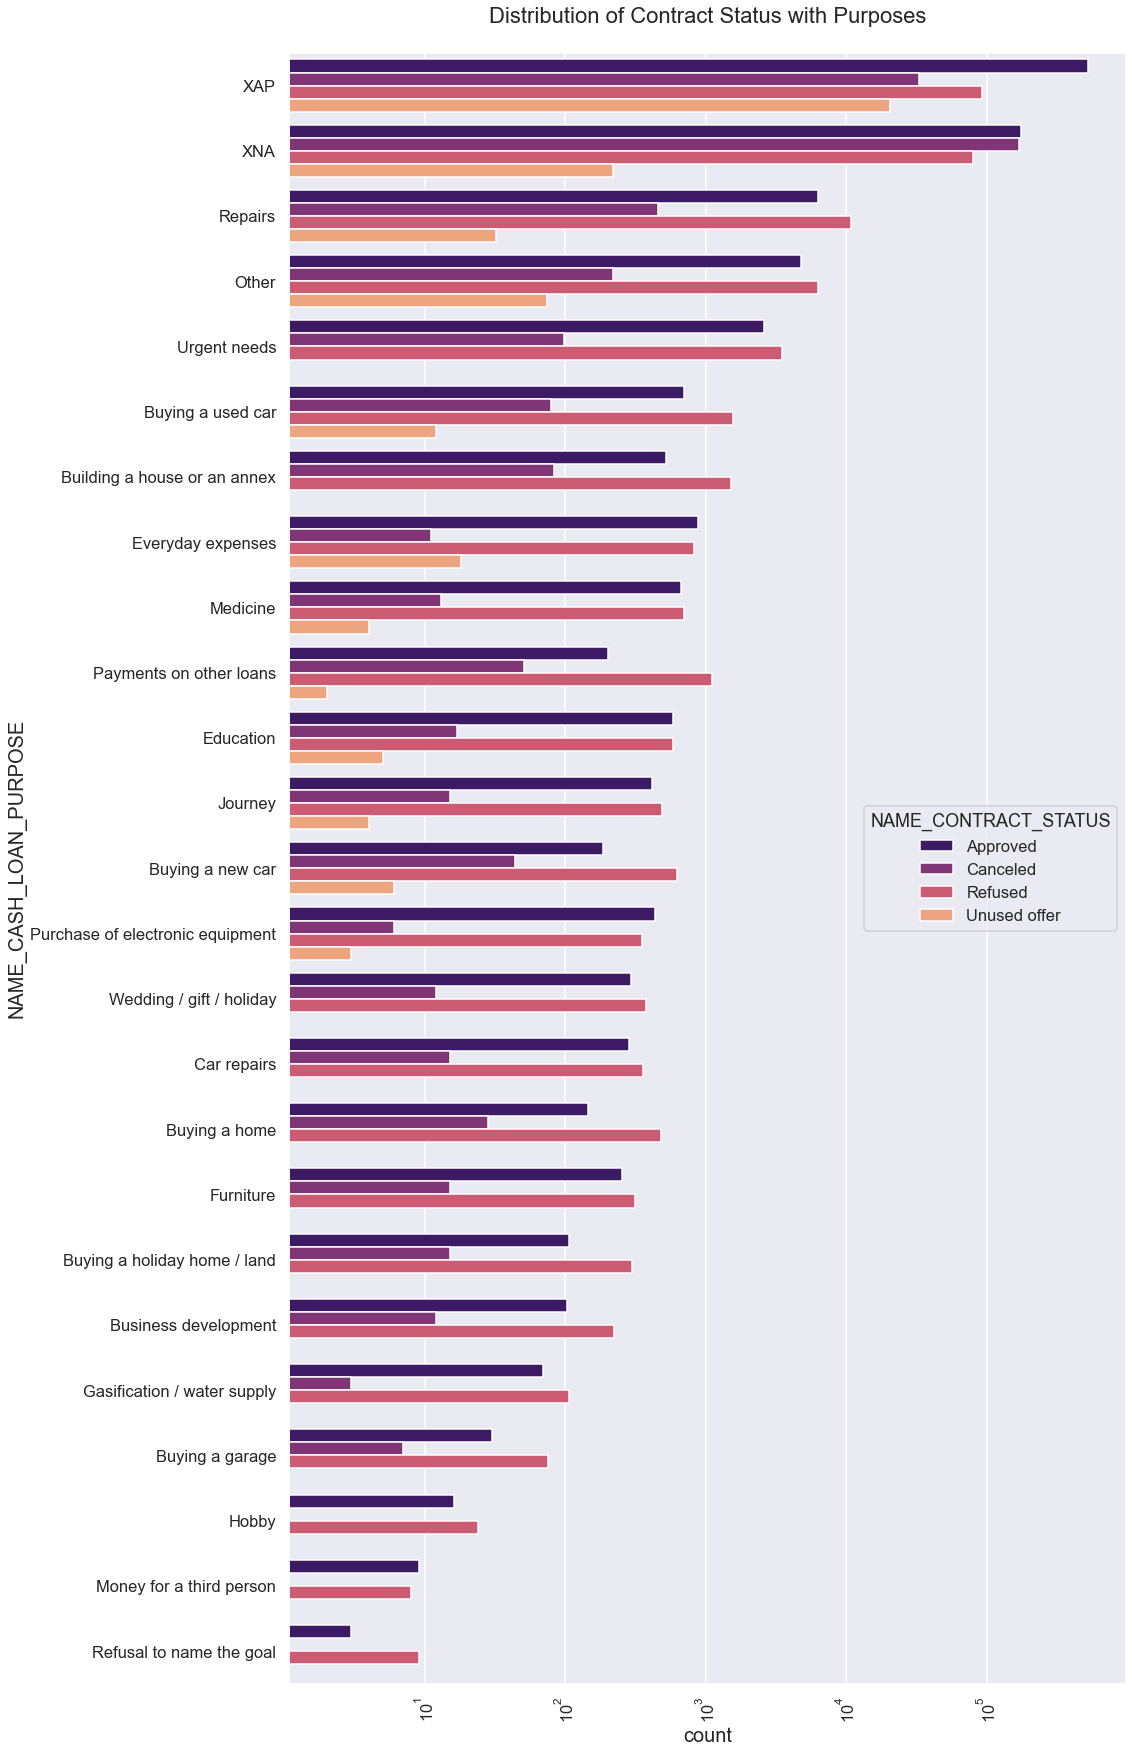

In [141]:
# Distribution of Cash Loans Vs Contract Purpose

sns.set_style('darkgrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of Contract Status with Purposes')

ax = sns.countplot(data = NewDf, y= 'NAME_CASH_LOAN_PURPOSE', order=NewDf['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma')

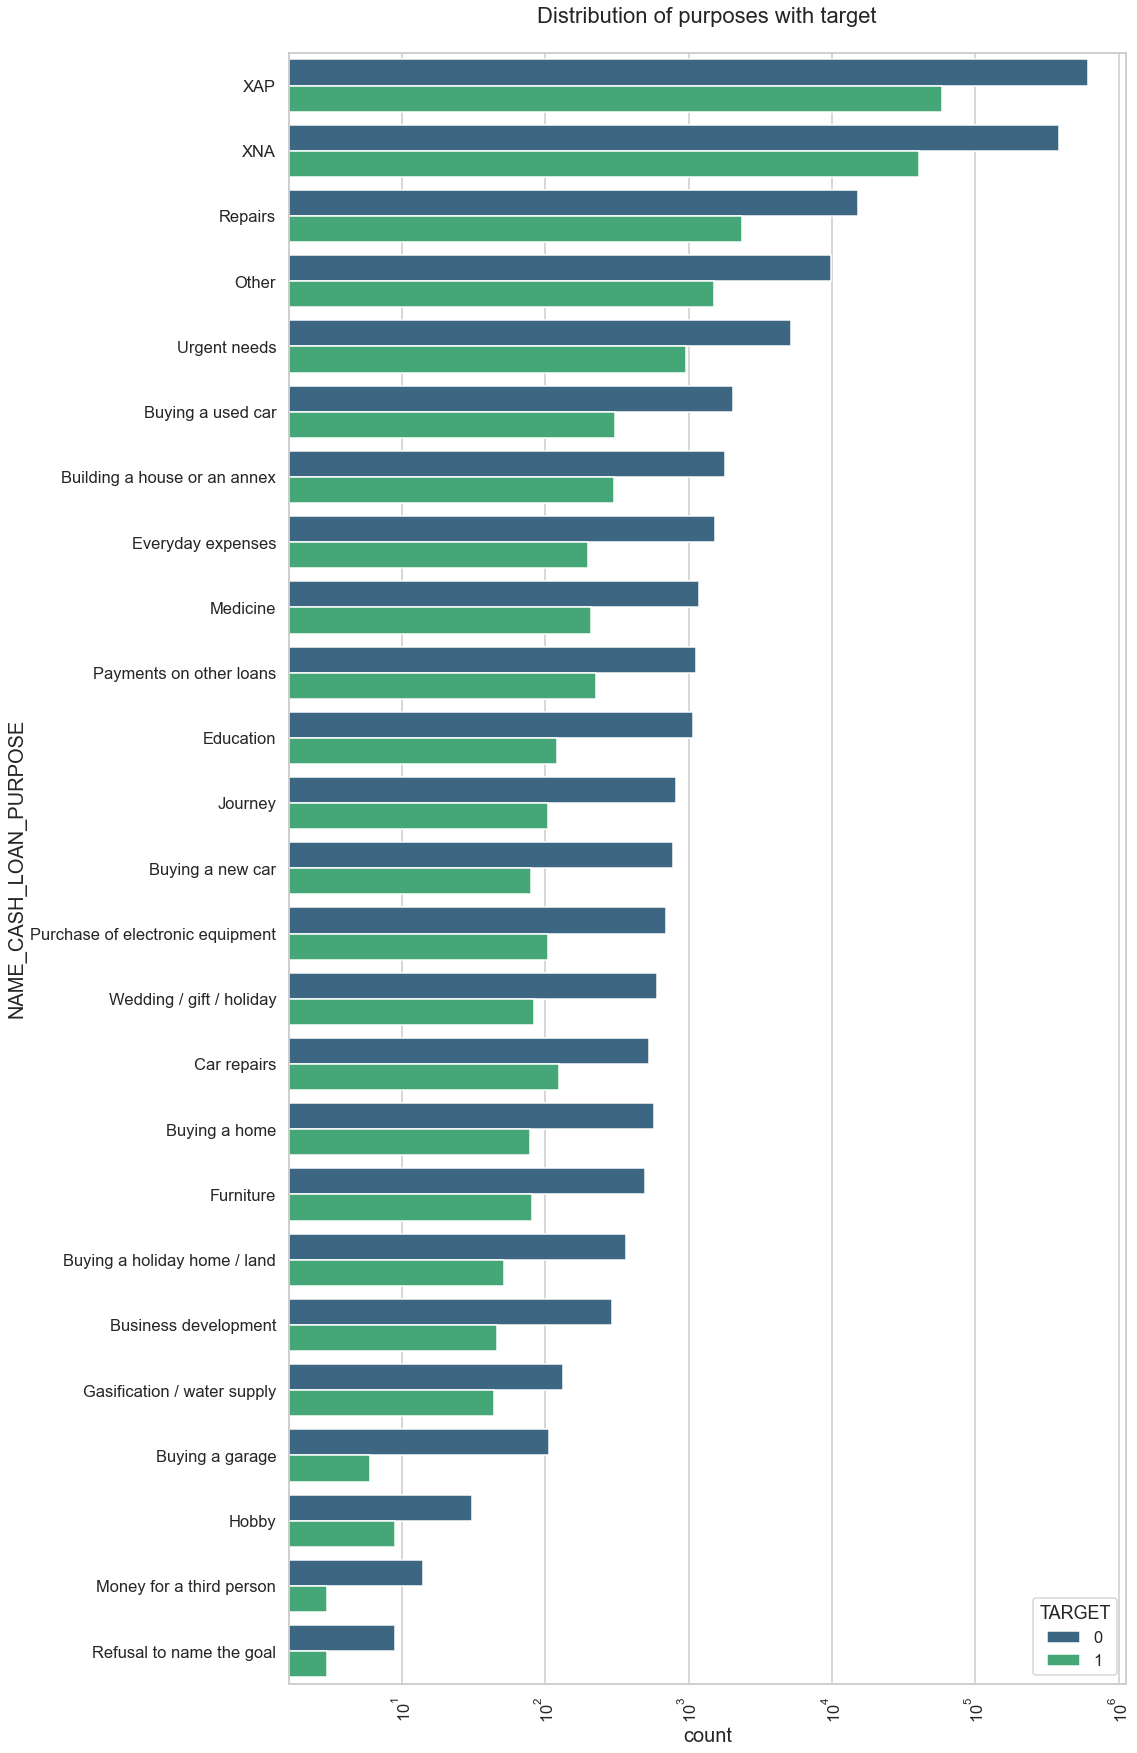

In [142]:
# Distribution of contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target')

ax = sns.countplot(data = NewDf, y= 'NAME_CASH_LOAN_PURPOSE', order=NewDf['NAME_CASH_LOAN_PURPOSE'].value_counts().index, hue ='TARGET', palette='viridis')

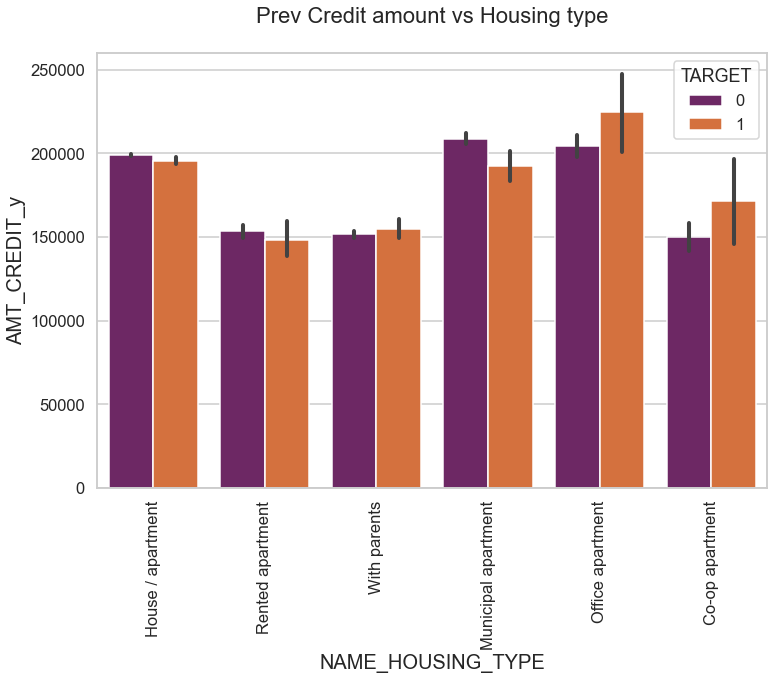

In [143]:
# Bar plotting for Credit amount prev vs Housing type

plt.figure(figsize=(12,8)) 
plt.xticks(rotation=90)
sns.barplot(data = NewDf, y='AMT_CREDIT_y',hue='TARGET',x='NAME_HOUSING_TYPE',palette='inferno')
plt.title('Prev Credit amount vs Housing type')
plt.show()

### Few important observations

1.Most loans were declined for repairs. Loan approval and rejection outcomes for education are comparable. The rejection rate for paying off other debt and getting a new automobile is significantly greater than the approval rate.
Repairs are having increasing trouble being paid on schedule. The loan payments for purchasing a garage, expanding a business, purchasing property, purchasing a new automobile, and financing education are often greater.
2.Co-op apartments have higher credit from defaulters than office apartments do from non-defaulters. For successful payments, the bank can concentrate mostly on dwelling type categories like "with parents," "house/apartment," or "municipal apartment."

In [148]:
# Target 0

#corr(data=target0,title='Correlation for target 0')

In [149]:
# Target 1

#corr(data=target1,title='Correlation for target 1')

In [150]:
# Target 0
no_payment_difficulty =data_appli[data_appli.TARGET == 0]

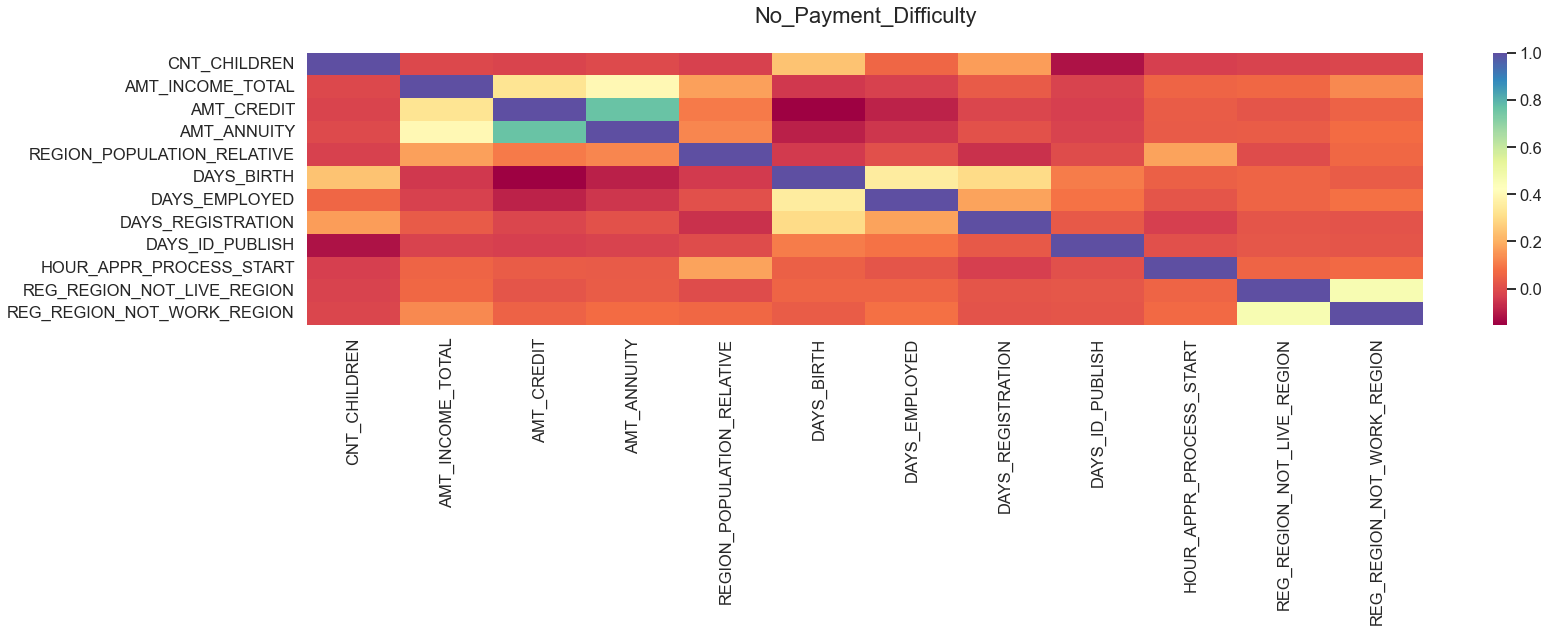

In [151]:
d1=no_payment_difficulty[["CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","REGION_POPULATION_RELATIVE","DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","HOUR_APPR_PROCESS_START","REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION"]]
plt.figure(figsize=(25, 5))
sns.heatmap(d1.corr(),cmap="Spectral")
plt.title('No_Payment_Difficulty')
plt.show()

There are other observations we may make, as shown by the heatmap of correlation up top.

1.Since credit amount and birthdate are inversely related, credit amount is higher for younger people and vice versa.
2.The quantity of credit is inversely correlated with the number of children a client has, therefore the amount of credit is larger when the client has fewer children and vice versa.
3.The quantity of revenue is inversely correlated with the number of children a customer has, therefore a client with fewer children will have more income than a client with more children.
4.In a heavily populated location, clients have fewer children.
5.Credit is given in greater amounts to heavily inhabited areas.
6.In areas with high population density, income is also higher.

In [152]:
# Target 1
payment_difficulty =data_appli[data_appli.TARGET == 1]

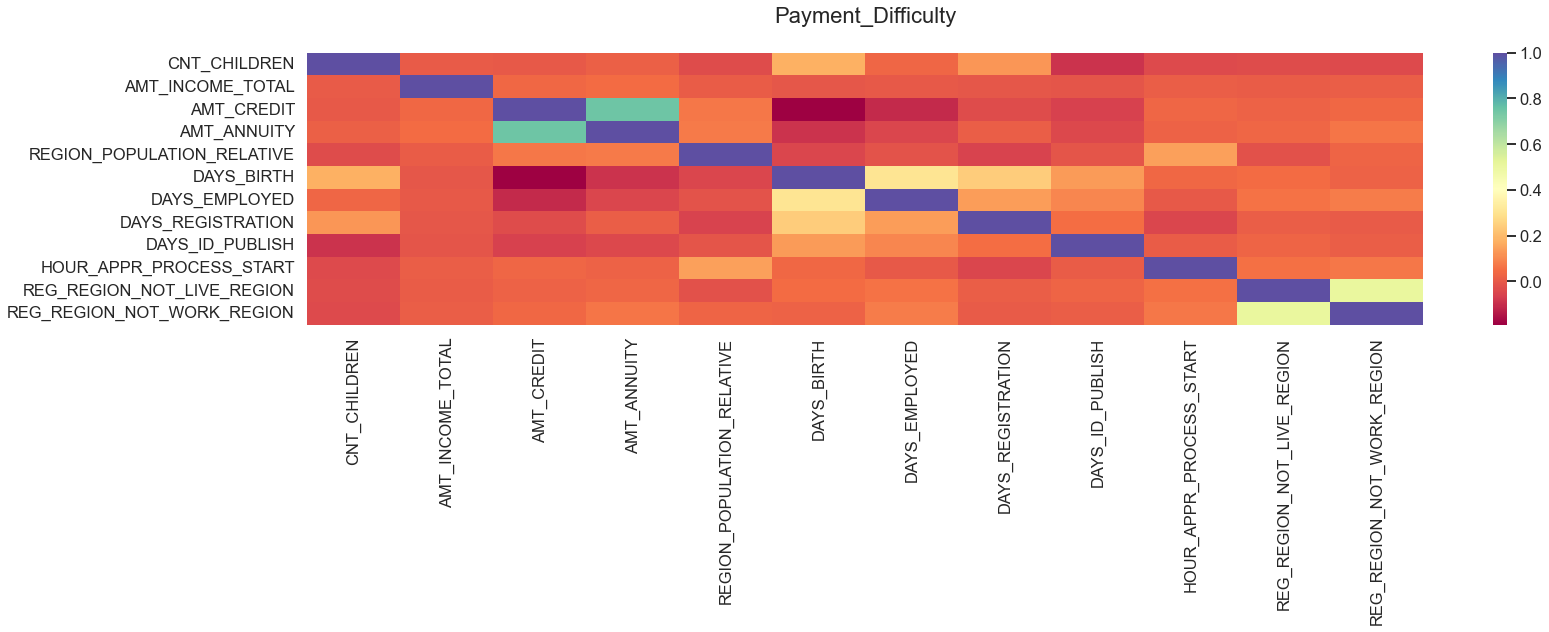

In [153]:
d2=payment_difficulty[["CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","REGION_POPULATION_RELATIVE","DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","HOUR_APPR_PROCESS_START","REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION"]]
plt.figure(figsize=(25, 5))
sns.heatmap(d2.corr(),cmap="Spectral")
plt.title('Payment_Difficulty')
plt.show()

Similar observations to those for Target 0 are included in this heat map for Target 1. However, there are some differences. Below is a list of them.

1.There are fewer children being born at the client's permanent address than at their contact address, and vice versa.
2.Less children are being born to clients whose permanent addresses differ from their work addresses, and vice versa.